# Importation des librairies

In [ ]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Statistiques et analyse de distribution
from scipy.stats import entropy, kstest

# Détection de langues
from langdetect import detect, DetectorFactory

# Gestion des fichiers et des dossiers
import os
import shutil
import re

# Utilitaires divers
from tqdm import tqdm  # Progress bar
from sklearn.model_selection import train_test_split

# Affichage des graphiques dans Jupyter Notebook
%matplotlib inline


# Chargement des données
Aperçu primaire des données fournis par le challenge: X_train_update.csv et Y_train_CVw08PX.csv

In [43]:
df_x_prev = pd.read_csv("./Raw DFs/X_train_update.csv")
df_y_prev=pd.read_csv("./Raw DFs/Y_train_CVw08PX.csv")
display(df_x_prev.head())
display(df_y_prev.head())

,Unnamed: 0,designation,description,productid,imageid
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705


Ajustement des dataframes en enlevant passant la colonne Unnamed: 0 en index
Nous avons egalement fait le choix de fusionner nos deux dataframes qui nous servira dans ce travail exploratoire des données.

In [44]:
df_x = pd.read_csv("./Raw DFs/X_train_update.csv",index_col=0)
df_y=pd.read_csv("./Raw DFs/Y_train_CVw08PX.csv",index_col=0)

merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True) #Pour analyse exploratoire uniquement
display(df_x.head(5))
display(df_y.head(5))
display(merged_df.head(5))

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


Recuperation des etiquettes correspondant aux aux identifiants prdtypecode. Nous allons pouvoir remplacer ces identifiants dans nos dataframes.

In [45]:
categorie = {
    10 : "Livre occasion",
    40 : "Jeu vidéo, accessoire tech.",
    50 : "Accessoire Console",
    60 : "Console de jeu",
    1140 : "Figurine",
    1160 : "Carte Collection",
    1180 : "Jeu Plateau",
    1280 : "Jouet enfant, déguisement",
    1281 : "Jeu de société",
    1300 : "Jouet tech",
    1301 : "Paire de chaussettes",
    1302 : "Jeu extérieur, vêtement",
    1320 : "Autour du bébé",
    1560 : "Mobilier intérieur",
    1920 : "Chambre",
    1940 : "Cuisine",
    2060 : "Décoration intérieure",
    2220 : "Animal",
    2280 : "Revues et journaux",
    2403 : "Magazines, livres et BDs",
    2462 : "Jeu occasion",
    2522 : "Bureautique et papeterie",
    2582 : "Mobilier extérieur",
    2583 : "Autour de la piscine",
    2585 : "Bricolage",
    2705 : "Livre neuf",
    2905 : "Jeu PC",
}

df_y["categorie"]=df_y['prdtypecode'].map(categorie)
merged_df["categorie"]=merged_df['prdtypecode'].map(categorie)
display(df_y.head())
display(merged_df.head())

,prdtypecode,categorie
0,10,Livre occasion
1,2280,Revues et journaux
2,50,Accessoire Console
3,1280,"Jouet enfant, déguisement"
4,2705,Livre neuf


,designation,description,productid,imageid,prdtypecode,categorie
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,Livre occasion
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,Revues et journaux
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,Accessoire Console
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,"Jouet enfant, déguisement"
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,Livre neuf


# Analyse globale

In [46]:
df_x.info()
print("\n")
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prdtypecode  84916 non-null  int64 
 1   categorie    84916 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


Au premier abord on s'aperçoit du nombre important de valeurs nulles dans la colonne description, suggérant le caractère falcultatif de cette colonne pour son remplissage. Les autres colonnes de notre jeu de données ne contiennent pas de valeurs manquantes. Le type des colonnes est en cohérence avec le fait que les colonnes description et designation (type object) contiennent bien des textes alors que les autres colonnes sont de type int64, contenant les identifiants (produit, image et catégorie) des produits.

## Génération d'un tableauu multi-index
Nous vérifions ici par colonne le nombre et le pourcentage de:
1) Valeurs manquantes
2) Doublons
3) Modalités uniques

In [47]:
# Vérification des valeurs manquantes
missing_x = df_x.isnull().sum()
missing_y = df_y.isnull().sum()

missing_x_percent = df_x.isnull().mean()*100
missing_y_percent = df_y.isnull().mean()*100

# Vérification des doublons
duplicate_designation = df_x.duplicated(subset=["designation"]).sum()
duplicate_description = df_x[~df_x["description"].isna()].duplicated(subset=["description"]).sum() #Doublons descriptions non nulles 
duplicate_productid = df_x.duplicated(subset=["productid"]).sum()
duplicate_imageid = df_x.duplicated(subset=["imageid"]).sum()
duplicate_prdtypecode = df_y.duplicated(subset=["prdtypecode"]).sum()

duplicate_designation_percent = df_x.duplicated(subset=["designation"]).mean()*100
duplicate_description_percent = df_x[~df_x["description"].isna()].duplicated(subset=["description"]).mean()*100
duplicate_productid_percent = df_x.duplicated(subset=["productid"]).mean()*100
duplicate_imageid_percent= df_x.duplicated(subset=["imageid"]).mean()*100
duplicate_prdtypecode_percent = df_y.duplicated(subset=["prdtypecode"]).mean()*100


# Unicité 
unique_designation = df_x['designation'].nunique()
unique_description = df_x['description'].nunique()
unique_productids = df_x['productid'].nunique()
unique_imageids = df_x['imageid'].nunique()
unique_prdtypecode = merged_df ['prdtypecode'].nunique()

# Création d'un MultiIndex pour la colonne "Vérification"
index = pd.MultiIndex.from_tuples(
    [("Valeurs manquantes", col) for col in df_x.columns] +
    [("Valeurs manquantes", col) for col in df_y.columns if col != "categorie"] +
    [("Doublons", "Designation"), ("Doublons", "Description"), ("Doublons", "Productid"),
     ("Doublons", "Imageid"), ("Doublons", "Prdtypecode")] +
    [("Unicité", "Designation"),("Unicité", "Description"),("Unicité", "Productids"), ("Unicité", "Imageids"),
     ("Unicité", "Prdtypecode")], names = ["Vérification", "Colonne"]
)

# Création des valeurs associées
values = [
    missing_x["designation"],
    missing_x["description"],
    missing_x["productid"],
    missing_x["imageid"],
    missing_y["prdtypecode"],
    duplicate_designation,
    duplicate_description,
    duplicate_productid,
    duplicate_imageid,
    duplicate_prdtypecode,
    unique_designation,
    unique_description, 
    unique_productids,
    unique_imageids,
    unique_prdtypecode
   
]

# Création des pourcentages associés
percent_values =[
    missing_x_percent["designation"],
    missing_x_percent["description"],
    missing_x_percent["productid"],
    missing_x_percent["imageid"],
    missing_y_percent["prdtypecode"],
    duplicate_designation_percent,
    duplicate_description_percent,
    duplicate_productid_percent,
    duplicate_imageid_percent,
    duplicate_prdtypecode_percent,
    unique_designation/len(df_x)*100,
    unique_description/len(df_x)*100,
    unique_productids/len(df_x)*100,
    unique_imageids/ len(df_x) * 100,
    unique_prdtypecode/len(df_x)*100
]

# Création du DataFrame avec le MultiIndex
verification_df = pd.DataFrame({
    "Valeur": values,
    "Valeur en %": percent_values
}, index=index)

display(verification_df)

print(f"Nombre de doublons exacte par ligne: {merged_df.duplicated().sum()}")

Valeur  Valeur en %
Vérification       Colonne                         
Valeurs manquantes designation       0     0.000000
                   description   29800    35.093504
                   productid         0     0.000000
                   imageid           0     0.000000
                   prdtypecode       0     0.000000
Doublons           Designation    2651     3.121909
                   Description    7610    13.807243
                   Productid         0     0.000000
                   Imageid           0     0.000000
                   Prdtypecode   84889    99.968204
Unicité            Designation   82265    96.878091
                   Description   47506    55.944698
                   Productids    84916   100.000000
                   Imageids      84916   100.000000
                   Prdtypecode      27     0.031796

Nombre de doublons exacte par ligne: 0


Premières observations suite à cette analyse globale:

Colonne désignation: 3% de doublons, relativement faible mais potentiellement problématique
Colonne description: 35% de valeurs manquantes (29800 valeurs) et 14% de doublons (7610 doublons): une stratégie de pré-traitement s'avèrera important à mettre en place pour gérer à la fois et doublons et les valeurs manquantes
Productsids et Images: Chaque produit a un productid et une imageid unique. 
Prdtypecode: Presque 100% de doublons, logique car 27 catégories pour 84916 produits

Par ailleurs il est interessant de noter qu'aucune ligne n'est retrouvée duppliqué malgrès le nombre important de doublons retrouvé dans descrpition. Ceci est logique puisque chaque ligne correspondant a un produit a imageid et un productid unique


Nous allons maintenant analyser les variables une à une. Cela nous permettra de juger des meilleurs stratégies à adopter pour gérer les doublons et valeurs manquantes mais egalement nous permettra de nous orienter vers le choix de modèles à tester.

# Analyse variable cible : prdtypecode

In [48]:
dftest=pd.DataFrame(class_distribution)
display(dftest)

,count
prdtypecode,
2583,10209
1560,5073
1300,5045
2060,4993
2522,4989
1280,4870
2403,4774
2280,4760
1920,4303


In [51]:
# Nombre total d'observations et de classes uniques
total_observations = df_y.shape[0]
unique_classes = df_y['prdtypecode'].nunique() # Ou sur le merge plus haut : unique_prdtypecode = merged_df ['prdtypecode'].nunique()

# Classes majoritaires et minoritaires
class_distribution= df_y['prdtypecode'].value_counts()
most_frequent_class = class_distribution.idxmax()
least_frequent_class = class_distribution.idxmin()

# Indice de déséquilibre
imbalance_ratio = class_distribution.max() / class_distribution.min()

# Écart-type des occurrences
std_classes = class_distribution.std()

# Test de normalité (Kolmogorov-Smirnov)
ks_test_result = kstest(class_distribution, 'norm')

# Mesure d'entropie (équilibre des classes)
class_entropy = entropy(class_distribution, base=2)

# Identification des classes sous-représentées (< 5% des données)
threshold = 0.05 * total_observations 
rare_classes = class_distribution[class_distribution < threshold].nunique()
rare_classes_percent = (rare_classes/unique_classes)*100

stat_analysis = pd.DataFrame({
    "Nombre total d'observations": [total_observations],
    "Nombre de classes uniques": [unique_classes],
    "Classe la plus fréquente": [most_frequent_class],
    "Classe la moins fréquente": [least_frequent_class],
    "Ratio desequilibre": [imbalance_ratio],
    "Écart-type des fréquences": [std_classes],
    "Test KS (stat, p-value)": [ks_test_result],
    "Entropie des classes": [class_entropy],
    "Classes rare":[rare_classes_percent]
    
})

display(stat_analysis)

,Nombre total d'observations,Nombre de classes uniques,Classe la plus fréquente,Classe la moins fréquente,Ratio desequilibre,Écart-type des fréquences,"Test KS (stat, p-value)",Entropie des classes,Classes rare
0,84916,27,2583,1180,13.362565,2103.248906,"(1.0, 0.0)",4.463017,66.666667


Comme dit plus haut on a bien 27 categories de produits qui vont permettre d'englober les 84916 produits dans cette base de données

Nous pouvons constater qu'il y a une forte disparité de distribution entre la classe la plus fréquente (2583) et la classe la moins fréquente (1180) avec un ratio d'imbalance de 13.36, ce qui est loin d'être negligeable. 
De plus l'écart-type des fréquences qui est de 2103 nous indique une forte dispersion dans la fréquence des classes et l'entropie de shannon des classes (de 4.46) nous temoigne d'une distribution déséquilibrée.

Ces premières observations sur la colonne prdtypecode nous indique un déséquilibre des classes avec impact possible sur le modèle : Les classes rares risquent d’être mal classifiées car le modèle aura moins d’exemples pour les apprendre. Il convient donc d'adopter une stratégie pour palier à ce problème :
- Undersampling
- Oversampling
- SMOTE
  
Il sera important d'évaluer ces différentes stratégies afin de sélectionner celle qui offre les meilleures performances.


## Analyse graphique
Pour illustrer ces propos nous avons réaliser un histogramme des fréquences par catégorie de produit (prdtypecode) ainsi qu'un boxplot des fréquences pour détecter les classes sous-représentés et les potentiels outliers (logiquement la categorie 2583)

C:\Users\rudy_\AppData\Local\Temp\ipykernel_14700\4039369831.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


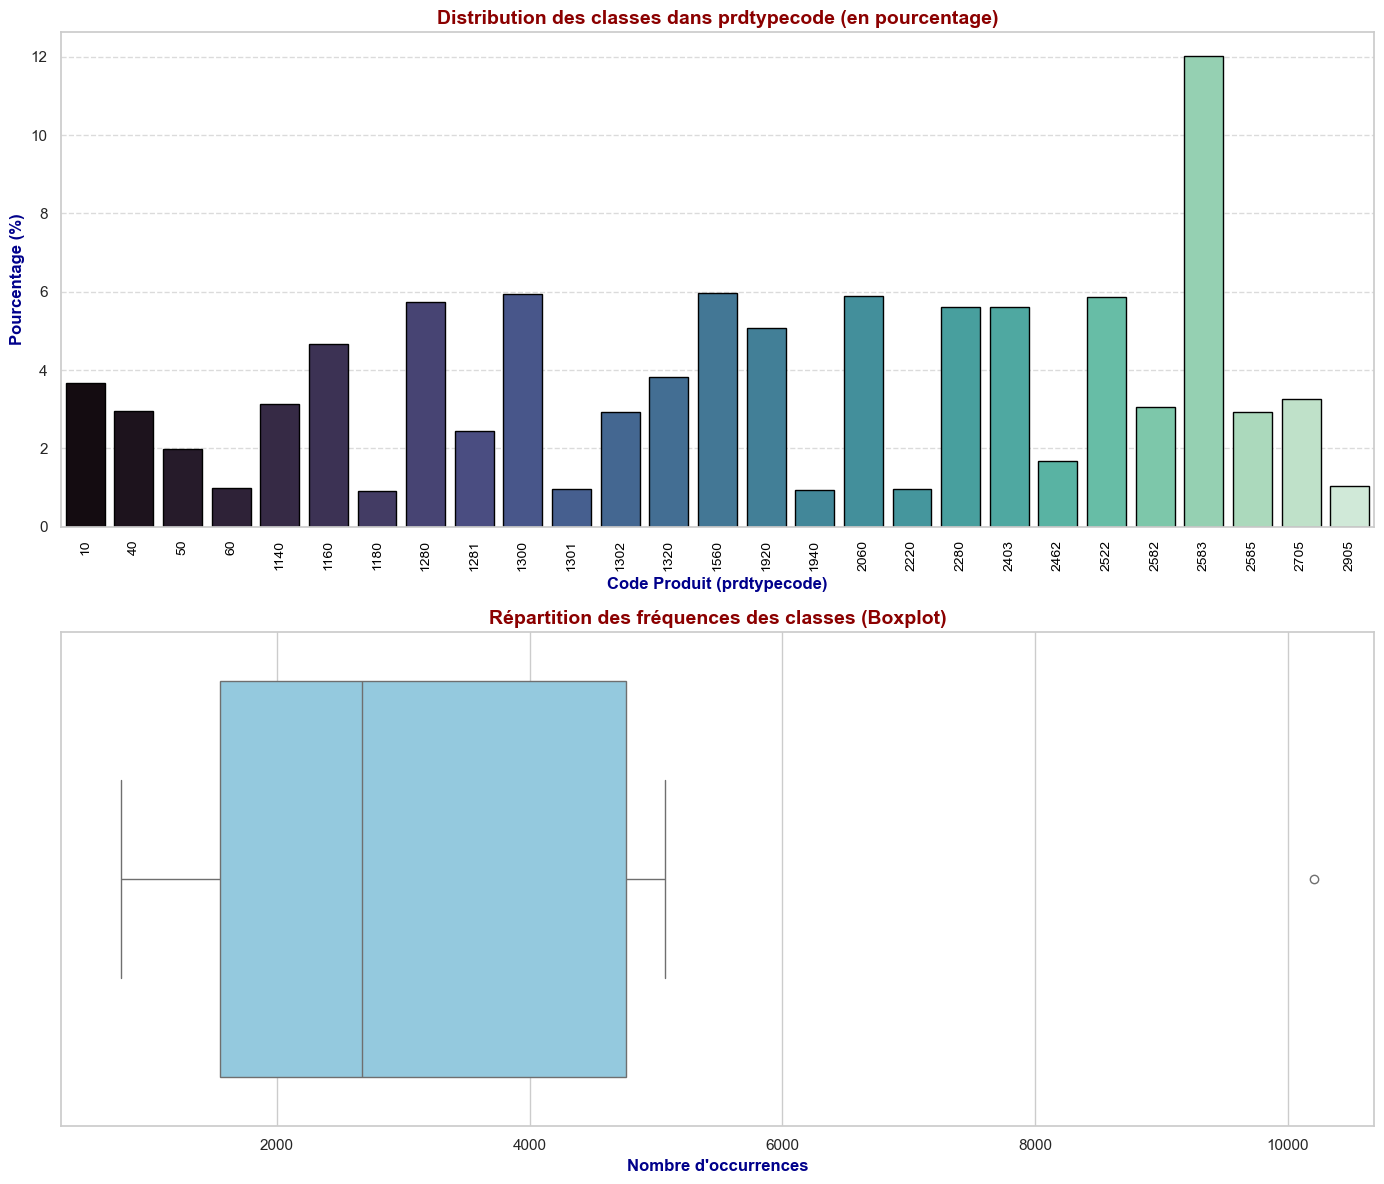

In [60]:
# Calculs des distributions
class_distribution_percent = df_y["prdtypecode"].value_counts(normalize=True) * 100
class_distribution = df_y["prdtypecode"].value_counts()  # Comptage brut

# Paramètres de style Seaborn
sns.set(style="whitegrid", palette="mako")

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

#  Barplot des fréquences par catégorie
sns.barplot(
    x=class_distribution_percent.index,
    y=class_distribution_percent.values,
    ax=axes[0],
    palette="mako",
    edgecolor="black"
)

axes[0].set_xlabel("Code Produit (prdtypecode)", fontsize=12, fontweight='bold', color='darkblue')
axes[0].set_ylabel("Pourcentage (%)", fontsize=12, fontweight='bold', color='darkblue')
axes[0].set_title("Distribution des classes dans prdtypecode (en pourcentage)", fontsize=14, fontweight='bold', color='darkred')
axes[0].tick_params(axis='x', rotation=90, labelsize=10, colors='black')
axes[0].grid(axis='y', linestyle="--", alpha=0.7)

#  Boxplot des fréquences
sns.boxplot(x=class_distribution.values, ax=axes[1], color="skyblue")
axes[1].set_xlabel("Nombre d'occurrences", fontsize=12, fontweight='bold', color='darkblue')
axes[1].set_title("Répartition des fréquences des classes (Boxplot)", fontsize=14, fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()


Nous avons également choisi de reporter dans le tableau ci-dessous le nombre d'occurences et la distribution en pourcentage des différentes classes de catégories

In [61]:
class_distribution_stats = pd.DataFrame({
    "Nombre d'occurrences": class_distribution,
    "Pourcentage": class_distribution_percent
})
display (class_distribution_stats)

,Nombre d'occurrences,Pourcentage
prdtypecode,,
2583,10209,12.022469
1560,5073,5.974139
1300,5045,5.941165
2060,4993,5.879928
2522,4989,5.875218
1280,4870,5.735079
2403,4774,5.622026
2280,4760,5.605540
1920,4303,5.067361


Nous avons également réaliser le graphique suivant afin d'expliciter d'avantage le déséquilibre de classes que nous rencontrons pour notre variable cible

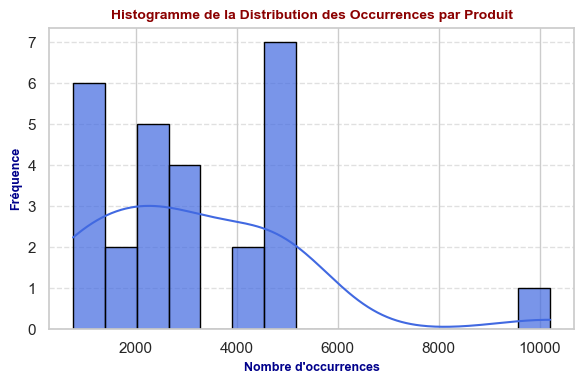

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.histplot(
    class_distribution.values, 
    bins=15, 
    kde=True, 
    ax=ax, 
    color='royalblue', 
    edgecolor="black",  
    alpha=0.7  
)
ax.set_xlabel("Nombre d'occurrences", fontsize=9, fontweight='bold', color='darkblue')
ax.set_ylabel("Fréquence", fontsize=9, fontweight='bold', color='darkblue')
ax.set_title("Histogramme de la Distribution des Occurrences par Produit", fontsize=10, fontweight='bold', color='darkred')
ax.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Nous remarquons que la distribution est asymétrique avec plusieurs pics. Il y a une répartition inégale des occurrences entre les produits.

Une categorie domine complètement et apparait très fréquemment (la categorie 2583 avec plus de 10 000 occurrences).
La majorité des produits ont un nombre d’occurrences plus faible. En effet, certains produits ont très peu d’occurrences (<2000).
Avec la courbe KDE on observe une décroissance progressive des fréquences après 4000 occurrences, avec un pic isolé vers 10 000 occurrences, indiquant qu’un petit groupe de produits est fortement sur-représenté


# Analyse Colonnes: Désignation et Description

Dans notre analyse globale nous avons pu voir deux points importants pour ces deux colonnes:
1) Le nombre important de valeurs manquantes dans descriptions (29800 valeurs manquantes, soit 35% de valeurs manquantes)
2) Un nombre important de doublons toujours pour la colonne description (7610 doublons, soit 13.8% de doublons) et quelques une pour la colonne designation (2651 doublons, soit 3.1%) 

Nous devons gérer ces problèmes pour optimiser la performance de nos modèles de prédictions.



## Que faire des valeurs manquantes dans description ? 

Il est tentant de se demander vu le nombre important de produits (84916) si la suppression des produits n'ayant pas de descriptions porteraient réelement atteinte aux performances de notre modèle de prédiction. Nous nous sommes alors demandé est ce que la suppression de ces doublons aura un impact ou non sur le nombre de produit par catégorie, avec comme hypothèse que comme vu que certaines classes ont peu de produits et que le pourcentage de valeurs manquantes, les supprimer pourraient potentiellement reduire drastiquement la quantité de produits présente dans ces catégories.

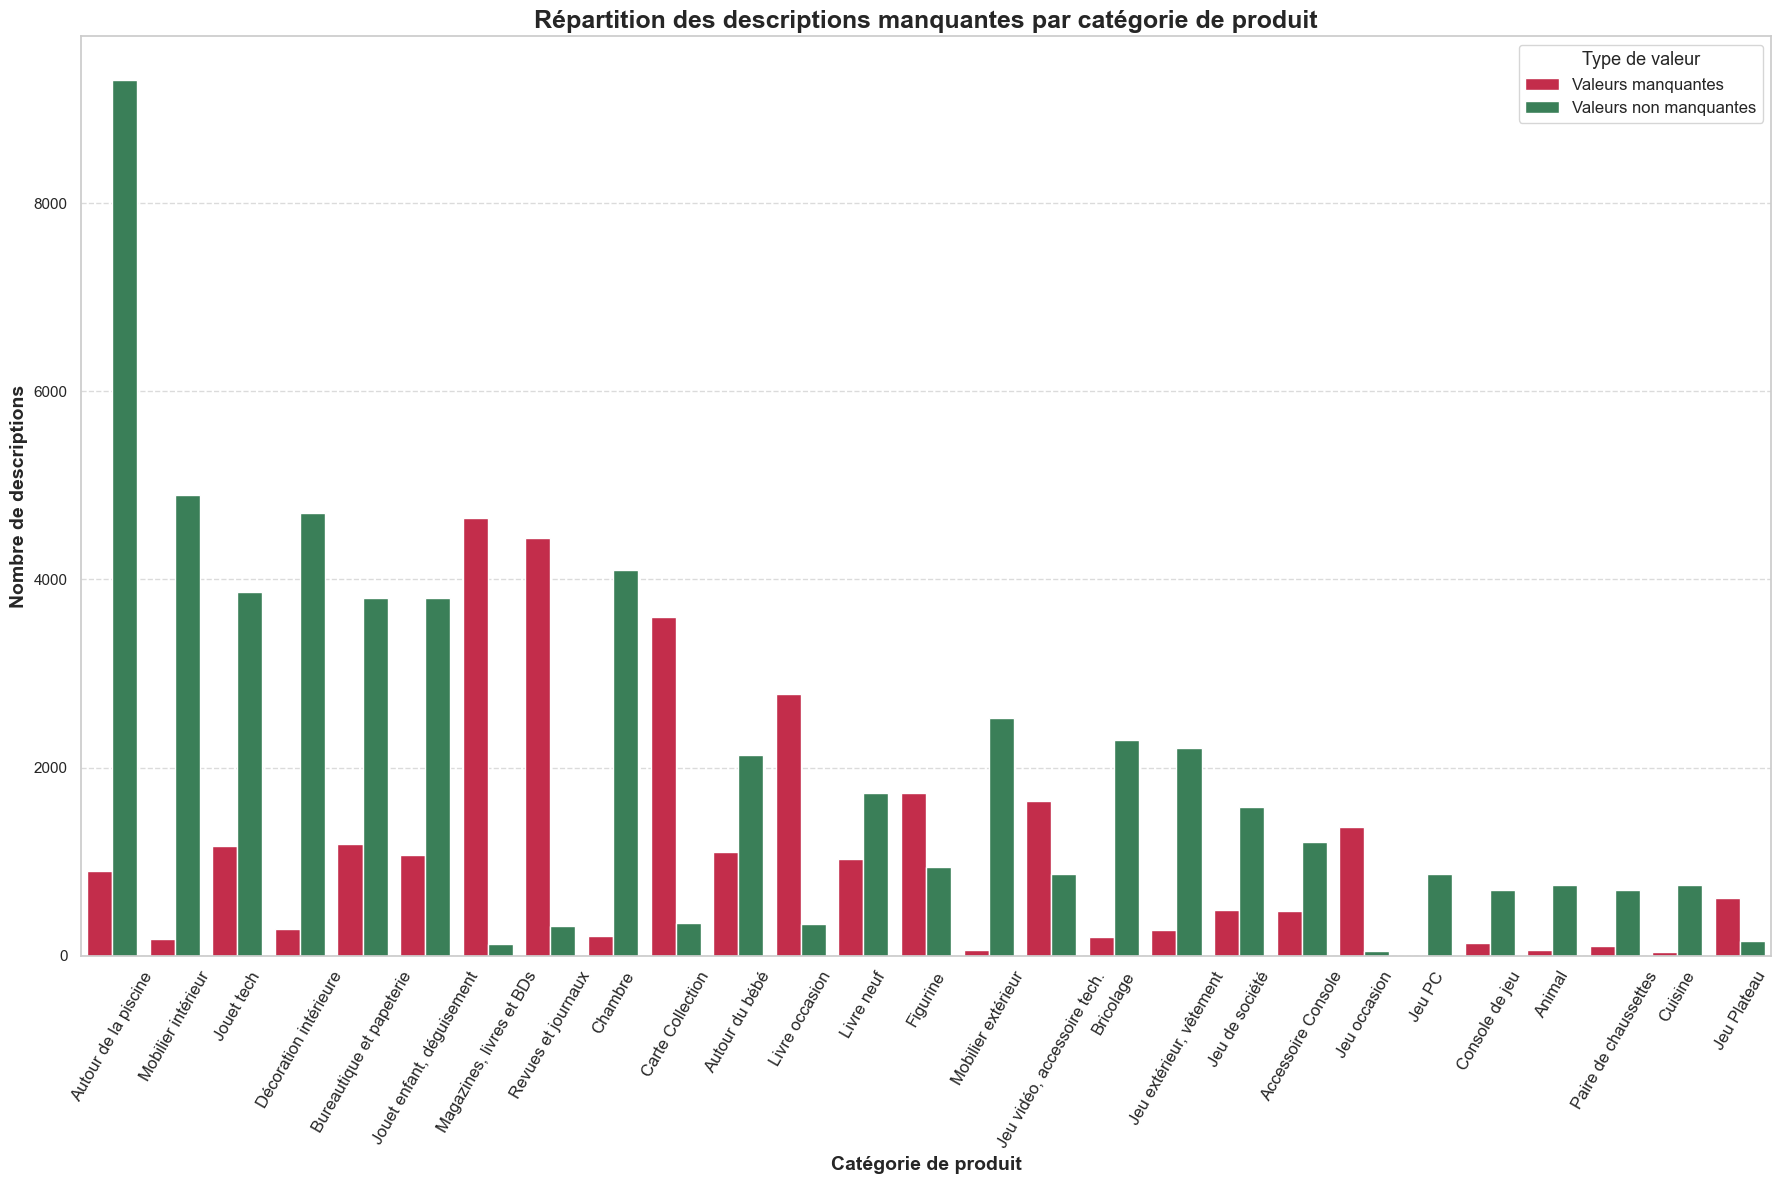

In [301]:
# Configuration Seaborn
sns.set(style="whitegrid", palette="muted")

# Calcul des occurrences par catégorie
category_counts = merged_df["categorie"].value_counts()

# Calcul des valeurs manquantes et non manquantes pour chaque catégorie
category_nan_counts = merged_df.groupby('categorie')['description'].apply(lambda x: x.isnull().sum())
category_non_nan_counts = merged_df.groupby('categorie')['description'].apply(lambda x: x.notnull().sum())

# Création du DataFrame pour la visualisation
nan_df = pd.DataFrame({
    'Catégorie': category_nan_counts.index,
    'Valeurs manquantes': category_nan_counts.values,
    'Valeurs non manquantes': category_non_nan_counts.values
})

# Transformation en format long pour Seaborn
nan_df_melted = pd.melt(nan_df, id_vars=['Catégorie'], value_vars=['Valeurs manquantes', 'Valeurs non manquantes'],
                        var_name='Type', value_name='Nombre')
"""Seaborn préfère ce format pour tracer des barplots groupés avec hue
frame: Le DataFrame d'origine
id_vars=None: Colonnes à garder telles quelles 
value_vars=None: Colonnes à "fondre"
var_name=None: Nom de la nouvelle colonne contenant les noms des anciennes colonnes
value_name='value': Nom de la nouvelle colonne contenant les valeurs
"""

# Tri des catégories par fréquence
nan_df_melted['Catégorie'] = pd.Categorical(nan_df_melted['Catégorie'], 
                                            categories=category_counts.index, #Categorie les plus frequences en premier
                                            ordered=True)
"""
    values: les données à convertir
    categories=None: l’ordre désiré des catégories
    ordered=False : True si on veut respecter l’ordre
"""

    
# Création du graphique avec Seaborn
plt.figure(figsize=(18, 12))
sns.barplot(data=nan_df_melted, x='Catégorie', y='Nombre', hue='Type', 
            palette={'Valeurs manquantes': 'crimson', 'Valeurs non manquantes': 'seagreen'})

# Ajout des labels
plt.title('Répartition des descriptions manquantes par catégorie de produit', fontsize=18, weight='bold')
plt.xlabel('Catégorie de produit', fontsize=14, weight='bold')
plt.ylabel('Nombre de descriptions', fontsize=14, weight='bold')
plt.xticks(rotation=60, fontsize=12)
plt.legend(title='Type de valeur', title_fontsize='13', fontsize='12')

# Grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage
plt.show()


De manière intéressante, si nous choisissons de supprimer les produits dépourvus de description, cela entraînera une perte d'information susceptible de réduire la capacité du modèle à généraliser. Cette suppression affectera de manière disproportionnée certaines catégories, telles que les jeux de plateau, les jeux d'occasion, les cartes de collection, etc. En conséquence, cela accentuerait le déséquilibre des classes, rendant la prédiction encore plus biaisée en faveur des catégories dominantes.

Pour atténuer cet effet, nous avons envisagé les stratégies alternatives suivantes :
- remplacer ces valeurs manquantes par "aucune description"
- l'enrichissement de la colonne description par la colonne designation
- **la concatenation de la colonne description et la colonne designation**


## Que faire des doublons ?

Un autre probleme rencontré lors de notre analyse globale, est le nombre important de doublons pour. Pour commencer, voici quelques exemples de doublons pour nos colonnes designations et descriptions

In [63]:
duplicated_designations = df_x[df_x.duplicated(subset=["designation"])].sort_values("designation").head()
print ("Quelques exemples de designations dupliqués:")
display (duplicated_designations)
print (" \n ")

# Quelques exemples de designations dupliquées
duplicated_description = df_x[df_x.duplicated(subset=["description"])].sort_values("description").head()
print ("Quelques exemples de descriptions dupliqués:")
display (duplicated_description)
print (" \n ")

Quelques exemples de designations dupliqués:


,designation,description,productid,imageid
10341,01:16 2rm Haute Vitesse Rc Voiture De Course À...,01:16 2RM haute vitesse RC voiture de course d...,4006488647,1275488903
69681,01:20 2.4ghz 2rm Radio Remote Control Off Road...,01:20 2.4GHZ 2RM Radio Remote Control Off Road...,3976901220,1271293302
50185,1 Paire Joy-Con Gamepad Poignée De Verrouillag...,1 paire Joy-Con Gamepad poignée de verrouillag...,3814580751,1248217908
49767,1 Pcs Vines Feuilles Fenêtre Porte Tulle Ridea...,1 PCS Vines Feuilles Tulle porte fenêtre ridea...,4022993783,1277606108
46119,1 paire chaussettes de coton Knee High Stripe ...,1 paire chaussettes de coton Knee High Stripe ...,3898718626,1261388125


 
 
Quelques exemples de descriptions dupliqués:


,designation,description,productid,imageid
70482,Lindner 2251022 Capsules Pour Monnaies-Paquet ...,Les capsules LINDNER sont de plus en plus uti...,3817904565,1248853110
52979,Lindner 8330175 Etuis Numismatiques Carton Har...,Les étuis numismatiques en carton de HARTBERG...,3817906586,1248862792
33865,Lindner 8320043 Etuis Numismatiques Carton Har...,Les étuis numismatiques en carton de HARTBERG...,3817906536,1248862667
67545,Creative Mobile Mur Avec Apposé Décoratif Mur ...,&amp; Nbsp; Creative mobile mur avec Apposé mu...,4006906642,1275663435
55582,Salle De Bain En Plastique Coin Cuisine Suppor...,&amp; nbsp plastique; Salle de bain Coin cuisi...,4017265460,1276829414


Nous avons ensuite voulu savoir si certains doublons etaient plus fréquents que d'autres et avons ainsi regardé leurs fréquences d'apparitions.
En particulier, le graphique suivant nous montre le top 20 des designations et des descriptions apparaissant le plus souvent 

C:\Users\rudy_\AppData\Local\Temp\ipykernel_14700\3716369624.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=designation_counts.values, y=designation_counts.index, palette="Blues_r", ax=axes[0])
C:\Users\rudy_\AppData\Local\Temp\ipykernel_14700\3716369624.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=description_counts.values, y=description_counts.index, palette="Greens_r", ax=axes[1])


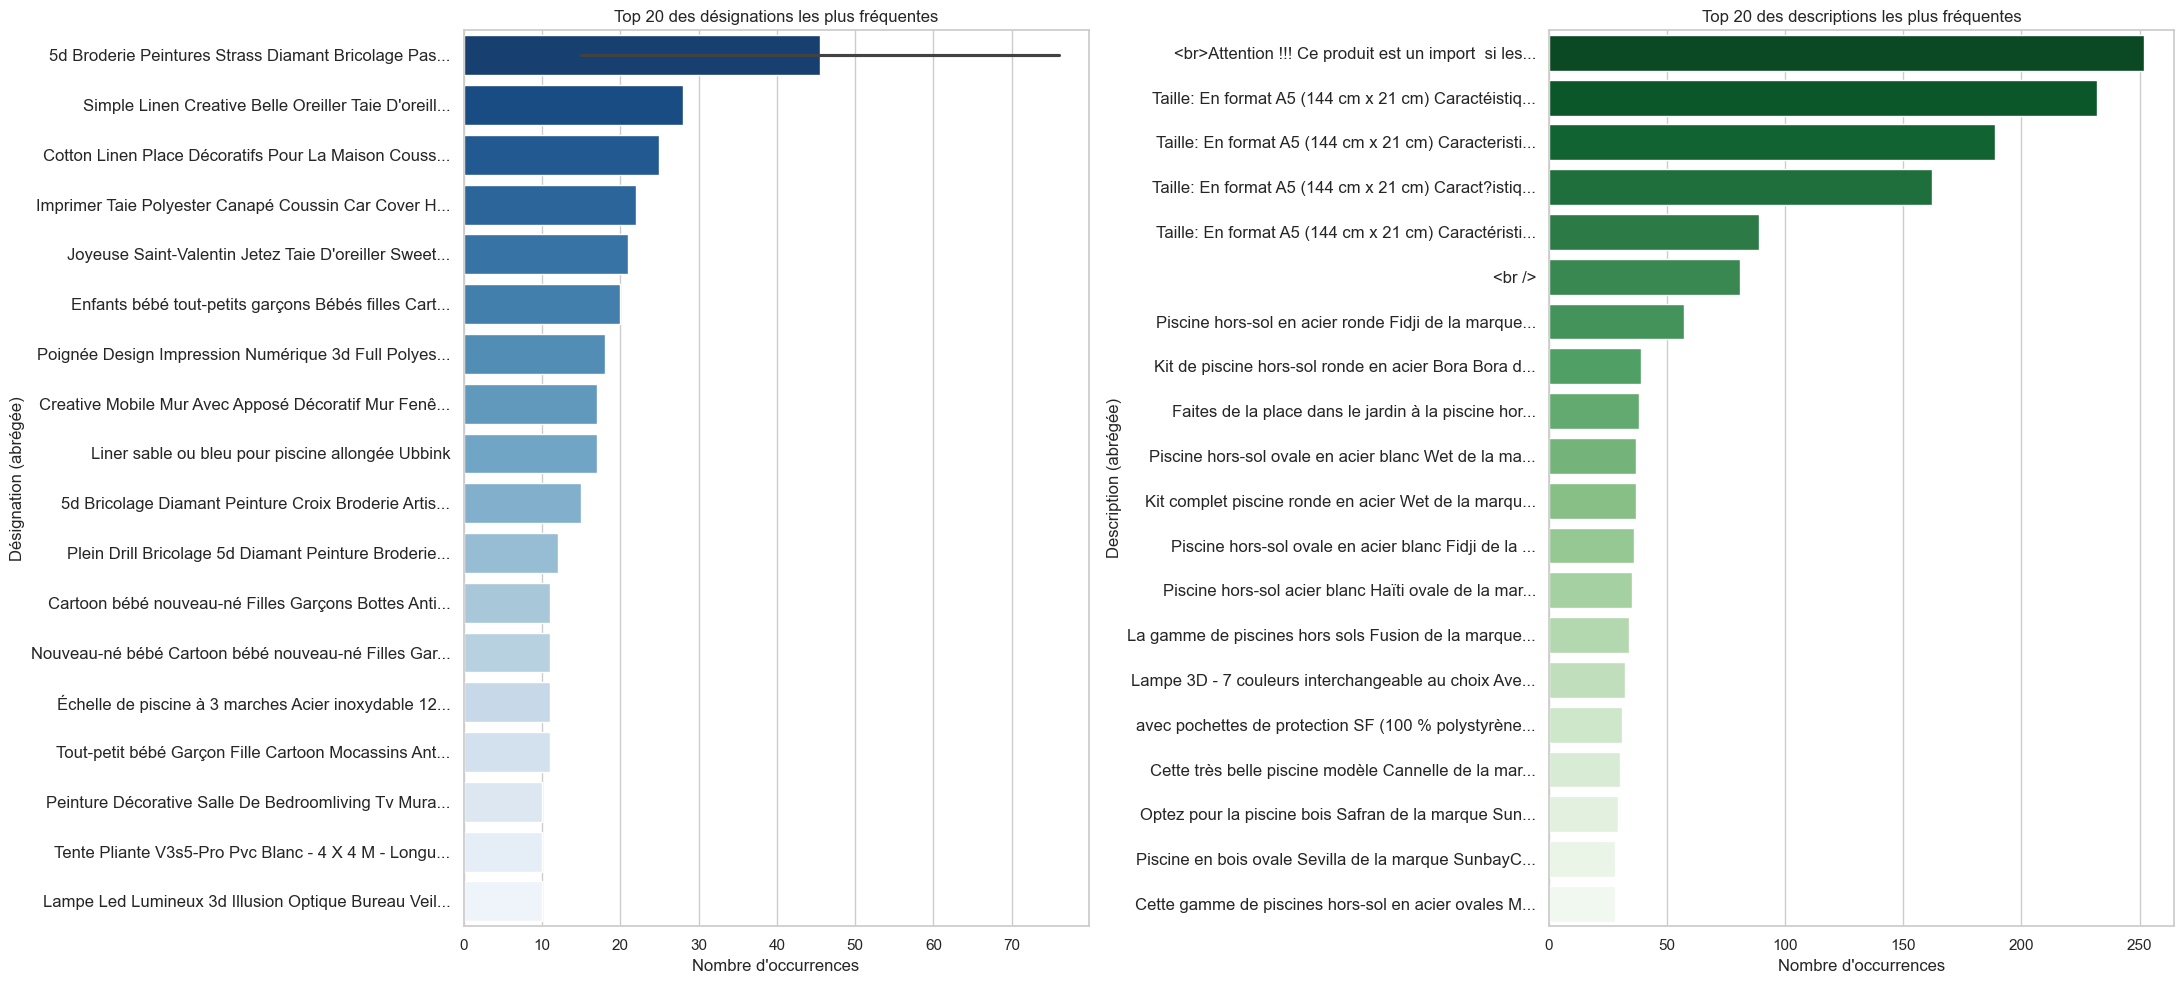

In [64]:
#Graphique des exemples de designations et descriptions
# Remplir les valeurs NaN
df_x["description"] = df_x["description"].fillna("")
df_x["designation"] = df_x["designation"].fillna("")

# Filtrer les lignes où la désignation ou la description sont vides
df_x_filtered = df_x[(df_x["designation"] != "") & (df_x["description"] != "")]


# Comptage des occurrences des désignations et descriptions les plus fréquentes
designation_counts = df_x_filtered["designation"].value_counts().head(20)
description_counts = df_x_filtered["description"].value_counts().head(20)

# Remplacer les index longs par des versions abrégées
designation_counts.index = designation_counts.index.to_series().apply(lambda x: x[:50] + "..." if len(x) > 50 else x)
description_counts.index = description_counts.index.to_series().apply(lambda x: x[:50] + "..." if len(x) > 50 else x)


fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# Barplot des désignations les plus fréquentes 
sns.barplot(x=designation_counts.values, y=designation_counts.index, palette="Blues_r", ax=axes[0])
axes[0].set_xlabel("Nombre d'occurrences")
axes[0].set_ylabel("Désignation (abrégée)")
axes[0].set_title("Top 20 des désignations les plus fréquentes")
axes[0].tick_params(axis='y', labelsize=12)

#  Barplot des descriptions les plus fréquentes 
sns.barplot(x=description_counts.values, y=description_counts.index, palette="Greens_r", ax=axes[1])
axes[1].set_xlabel("Nombre d'occurrences")
axes[1].set_ylabel("Description (abrégée)")
axes[1].set_title("Top 20 des descriptions les plus fréquentes")
axes[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.show()


Regardons maintenant la distribution du nombre de doublons par désignations d'un coté et par description de l'autre. 

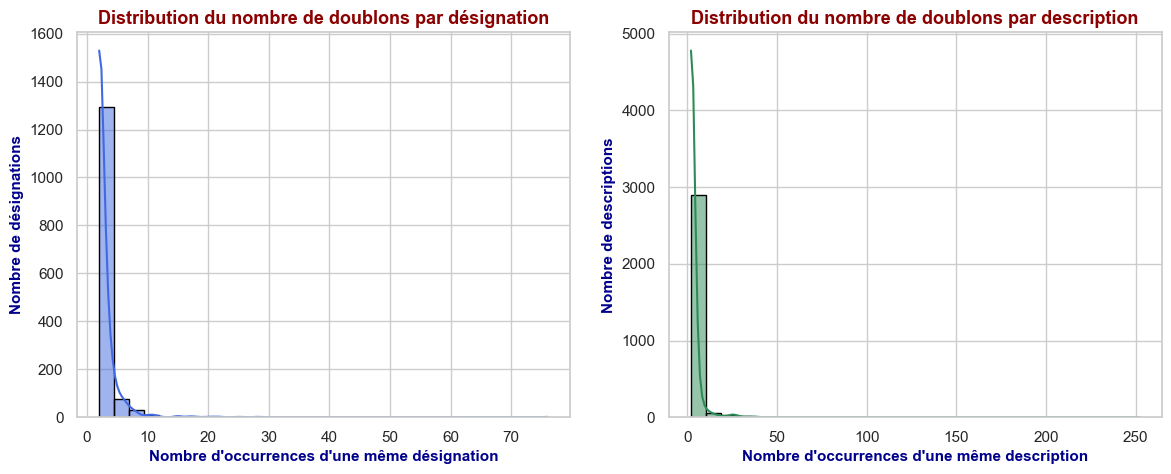

,designation,count
0,5d Broderie Peintures Strass Diamant Bricolage...,76
1,Simple Linen Creative Belle Oreiller Taie D'or...,28
2,Cotton Linen Place Décoratifs Pour La Maison C...,25
3,Imprimer Taie Polyester Canapé Coussin Car Cov...,22
4,Joyeuse Saint-Valentin Jetez Taie D'oreiller S...,21
...,...,...
1417,Piscine Beach Wave 229x229x56 cm 57495NP,2
1418,S4sassy Plumes Aquarelle Dicorla Maison Taie D...,2
1419,Mandala Flower Chambre Indian Art Stickers Mur...,2
1420,Porte-Bébé Respirant 360 ° Ergonomique Sacs À ...,2


,description,count
0,<br>Attention !!! Ce produit est un import si...,252
1,Taille: En format A5 (144 cm x 21 cm) Caractéi...,232
2,Taille: En format A5 (144 cm x 21 cm) Caracter...,189
3,Taille: En format A5 (144 cm x 21 cm) Caract?i...,162
4,Taille: En format A5 (144 cm x 21 cm) Caractér...,89
...,...,...
2996,Mode féminine Caméra simili-cuir sac à bandoul...,2
2997,Vanne double union pour votre filtration pisci...,2
2998,Taille: 9.4 cm x 6 cm x 0.9 cm caractéristiqu...,2
2999,Lapin de Pâques heux Taie d&#39;oreiller Linge...,2


In [69]:
# Comptage des occurrences des désignations et descriptions
description_counts = df_x["description"].dropna()
description_counts = description_counts[description_counts.str.strip() != ""].value_counts() 
""" "description" contient 29800 chaînes vides "", elles ont été considérées comme une valeur valable et comptées comme un doublon d'où leur suppression"""


# Création des DataFrames des doublons (uniquement les valeurs apparaissant plus d'une fois)
df_designation_duplicates = designation_counts.reset_index()
df_designation_duplicates.columns = ["designation", "count"]
df_designation_duplicates = df_designation_duplicates[df_designation_duplicates["count"] > 1]


df_description_duplicates = description_counts.reset_index()
df_description_duplicates.columns = ["description", "count"]
df_description_duplicates = df_description_duplicates[df_description_duplicates["count"] > 1]


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#  Histogramme des doublons de désignation
sns.histplot(df_designation_duplicates["count"], bins=30, kde=True, color="royalblue", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Nombre d'occurrences d'une même désignation", fontsize=11, fontweight='bold', color='darkblue')
axes[0].set_ylabel("Nombre de désignations", fontsize=11, fontweight='bold', color='darkblue')
axes[0].set_title("Distribution du nombre de doublons par désignation", fontsize=13, fontweight='bold', color='darkred')

#  Histogramme des doublons de description
sns.histplot(df_description_duplicates["count"], bins=30, kde=True, color="seagreen", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Nombre d'occurrences d'une même description", fontsize=11, fontweight='bold', color='darkblue')
axes[1].set_ylabel("Nombre de descriptions", fontsize=11, fontweight='bold', color='darkblue')
axes[1].set_title("Distribution du nombre de doublons par description", fontsize=13, fontweight='bold', color='darkred')


plt.show()

display (df_designation_duplicates)
display (df_description_duplicates)

Distribution des doublons par désignation (graphique de gauche)
La distribution est fortement asymétrique à droite, avec une grande majorité des désignations apparaissant très peu de fois. La plupart des désignations apparaissent 2 à 3 fois (cf code), avec un pic marqué à 1 occurrence. Quelques désignations sont répétées jusqu'à environ 70 fois, bien que cela soit rare.
Interprétation : La majorité des désignations sont peu répétées. Les cas de forte répétition peuvent indiquer des erreurs de saisie, des variantes minimes ou des produits standardisés avec la même désignation.

Distribution des doublons par description (graphique de droite)
Comme pour les désignations, la distribution est également asymétrique à droite, mais avec un étalement un peu plus large. La majorité des descriptions apparaissent 2 à 5 fois (cf code). Quelques descriptions sont répétées jusqu'à environ 250 fois, ce qui suggère des descriptions standard pour certains types de produits. 
Interprétation : Cela peut indiquer l'utilisation de descriptions génériques pour des produits similaires ou des pratiques de saisie standardisées. 


On pourrait comme pour le problème de valeurs manquantes se demander s'il serait bénéfique de supprimer ces doublons pour améliorer la qualité de notre future prédiction. Neanmoins en y réflechissant nous devons tout d'abord vérifier si bien que certaines designations soient dupliqués, la description associée pourrait pourrait apporter une couche d'informations supplémentaires sur le produit permettant sa distinction lors de la classification et inversement pour les doublons de descriptions.  C'est ce que nous avons voulu evaluer dans le graphique suivant.

PS : Les deux tableaux nous permettent de visualiser si mes duplicats de designation ou de descriptions sont associés avec respectivement des descriptions ou des designations uniques.

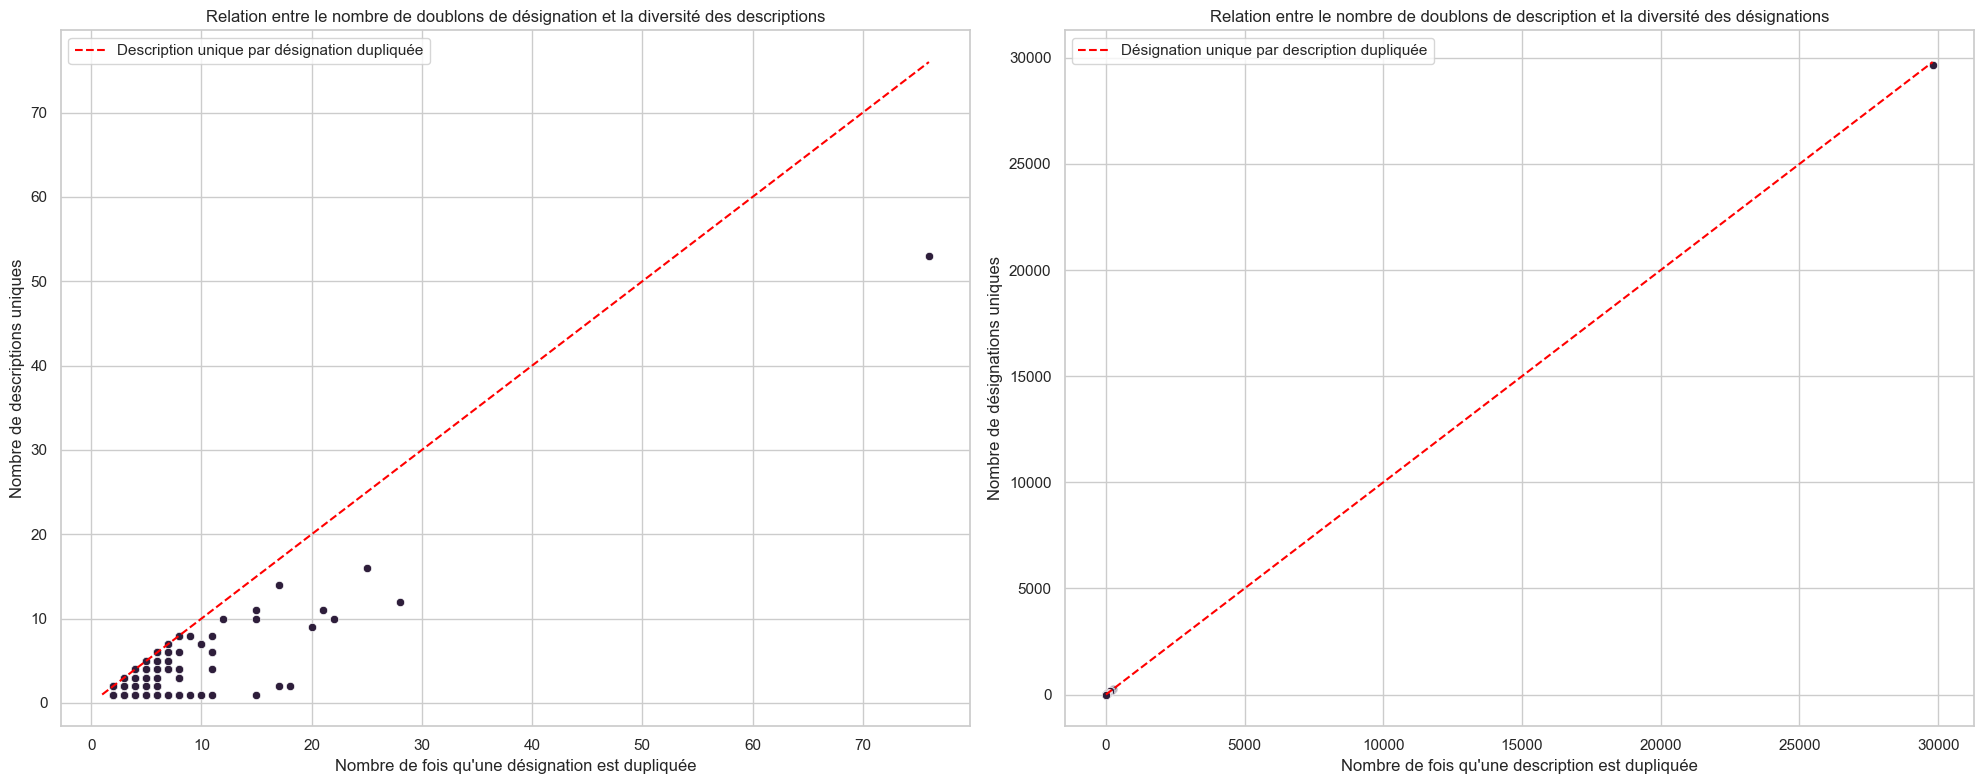




Tableau des doublons de désignation avec diversité des descriptions :


,designation,count,unique_descriptions
137,5d Broderie Peintures Strass Diamant Bricolage...,76,53
1237,Simple Linen Creative Belle Oreiller Taie D'or...,28,12
400,Cotton Linen Place Décoratifs Pour La Maison C...,25,16
702,Imprimer Taie Polyester Canapé Coussin Car Cov...,22,10
729,Joyeuse Saint-Valentin Jetez Taie D'oreiller S...,21,11
...,...,...,...
565,Ensemble De Salle À Manger D'extérieur 7 Pcs P...,2,1
571,Ensemble de piscine Ultra XTR Frame Rectangula...,2,1
574,Espace Romantique Valentine Day Tapis Mat Sall...,2,1
575,Etui De Protection Absorption Des Chocs Envelo...,2,1





Tableau des doublons de description avec diversité des désignations :


,description,count,unique_designations
0,,29800,29680
313,<br>Attention !!! Ce produit est un import si...,252,251
2702,Taille: En format A5 (144 cm x 21 cm) Caractéi...,232,231
2700,Taille: En format A5 (144 cm x 21 cm) Caracter...,189,170
2309,Piscine hors-sol ovale en acier blanc Wet de l...,37,36
...,...,...,...
1228,Décoration du foyer Coussin Style de Throw Tai...,2,1
1202,Doux nouveau tissu Intelligence bébé Développe...,2,1
1205,Drapeaux de jardin saisonniers Double Sided Va...,2,1
1207,Draps en coton Taie Canapé taille Throw Coussi...,2,1


In [70]:
# Analyse des désignations et des descriptions

# Duplicats par désignation et description
df_designation_duplicates = df_x[df_x.duplicated(subset=["designation"], keep=False)]
df_description_duplicates = df_x[df_x.duplicated(subset=["description"], keep=False)]

# Descriptions uniques par désignation
df_unique_description = df_x.groupby("designation")["description"].nunique().reset_index()
df_unique_description.columns = ["designation", "unique_descriptions"]

# Analyse des désignations
df_description_analysis = df_designation_duplicates.groupby("designation").agg(count=("designation", "size"), unique_descriptions=("description", "nunique")).reset_index()
df_description_analysis_sorted = df_description_analysis.sort_values(by="count", ascending=False)

# Identification des incohérences
df_mismatched_description = df_description_analysis_sorted[df_description_analysis_sorted["unique_descriptions"] != df_description_analysis_sorted["count"]]

# Graphiques pour la relation entre doublons de désignation et diversité des descriptions
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Graphique 1 : Doublons de désignation vs descriptions uniques
sns.scatterplot(ax=axes[0], x=df_description_analysis_sorted["count"], y=df_description_analysis_sorted["unique_descriptions"])
max_x = df_description_analysis_sorted["count"].max()
axes[0].plot(np.arange(1, max_x + 1), np.arange(1, max_x + 1), linestyle="dashed", color="red", label="Description unique par désignation dupliquée")
axes[0].set_xlabel("Nombre de fois qu'une désignation est dupliquée")
axes[0].set_ylabel("Nombre de descriptions uniques")
axes[0].set_title("Relation entre le nombre de doublons de désignation et la diversité des descriptions")
axes[0].legend()

# Analyse des descriptions
df_designation_analysis = df_description_duplicates.groupby("description").agg(count=("description", "size"), unique_designations=("designation", "nunique")).reset_index()
df_designation_analysis_sorted = df_designation_analysis.sort_values(by="count", ascending=False)

# Identification des incohérences entre doublons de description et désignations uniques
df_mismatched_designations = df_designation_analysis_sorted[df_designation_analysis_sorted["unique_designations"] != df_designation_analysis_sorted["count"]]

# Graphique 2 : Doublons de description vs désignations uniques
sns.scatterplot(ax=axes[1], x=df_designation_analysis_sorted["count"], y=df_designation_analysis_sorted["unique_designations"])
max_x = df_designation_analysis_sorted["count"].max()
axes[1].plot(np.arange(1, max_x + 1), np.arange(1, max_x + 1), linestyle="dashed", color="red", label="Désignation unique par description dupliquée")
axes[1].set_xlabel("Nombre de fois qu'une description est dupliquée")
axes[1].set_ylabel("Nombre de désignations uniques")
axes[1].set_title("Relation entre le nombre de doublons de description et la diversité des désignations")
axes[1].legend()

plt.tight_layout()
plt.show()

# Affichage des résultats
print("\n\n")
print("Tableau des doublons de désignation avec diversité des descriptions :")
display(df_mismatched_description)
print("\n\n")
print("Tableau des doublons de description avec diversité des désignations :")
display(df_mismatched_designations)

### Analyse doublons Désignations et diversité description
Lorsque l'on regarde le graphique, certaints points se trouvent sur la ligne rouge pointilée, signifiant que ces doublons désignations sont chacune associées à des descriptions distinctes. Cela indique que la description joue un rôle différenciateur, enrichissant l'information disponible pour le modèle. Cette diversité descriptive peut ainsi améliorer la capacité du modèle à reconnaître des produits similaires malgré des formulations variées.

De nombreuses désignations sont répétées avec peu ou pas de descriptions uniques, ce qui suggère des produits similaires avec des variations minimes, comme des t-shirts différenciés par la taille ou la couleur. Lorsque la description est trop générique, la désignation et la description restent identiques pour des produits appartenant à la même catégorie. Cette situation peut entraîner un risque d'overfitting : le modèle pourrait mémoriser ces exemples plutôt que d'apprendre les caractéristiques générales des produits, compromettant sa capacité de généralisation face à de nouveaux produits.



### Analyse doublons Descriptions et diversité designations
La majorité des points se trouvent sur ou très proches de la ligne rouge pointillée. Cela indique que chaque fois qu'une description est dupliquée, elle correspond généralement à une désignation unique. Ainsi, bien que les produits soient similaires, ils sont traités comme distincts grâce à leur désignation. En conséquence, certaines descriptions restent suffisamment différenciées pour faciliter la classification par le modèle, même lorsque la désignation varie.

Cependant, quelques points se situent sous la ligne rouge. Cela signifie qu'un même produit (désignation unique) est enregistré plusieurs fois avec la même description. Lorsque la description manque de précision, cela conduit à des désignations et descriptions identiques pour des produits distincts appartenant à une même catégorie. Comme mentionné précédemment (paragraphe désignation), cela peut entraîner un risque d'overfitting, limitant la capacité du modèle à généraliser efficacement face à de nouveaux produits.


### Attention
Un problème critique peut survenir lorsque des produits partagent la même désignation et la même description tout en étant associés à des catégories différentes. Face à ces signaux contradictoires, le modèle peine à identifier la catégorie correcte, ce qui augmente les erreurs de classification. Il aura tendance à sur-predire la catégorie majoritaire tout en sous-predisant les catégories minoritaires, introduisant ainsi un biais dans les prédictions.

### Comment y remédier ?
La première étape consiste à vérifier si les doublons textuels exacts (désignation/description) sont systématiquement attribués à une seule catégorie ou s'ils sont répartis entre plusieurs catégories.


In [71]:
# Vérification des produits avec la même `designation` et `description` apparaissant dans plusieurs `prdtypecode`
same_designation_description_list = merged_df.groupby(["designation", "description"])[["prdtypecode", "categorie"]].agg(list).reset_index()
same_designation_description_list = same_designation_description_list[same_designation_description_list["prdtypecode"].apply(lambda x: len(set(x)) > 1)]
same_designation_description_list["Noms des catégories"] = same_designation_description_list["categorie"].apply(lambda x: ' & '.join(sorted(set(x))))
same_designation_description_list.drop(columns=["categorie"], inplace=True)

# Vérification du nombre de catégories différentes
same_designation_description_count = merged_df.groupby(["designation", "description"])["prdtypecode"].nunique().reset_index()
same_designation_description_count = same_designation_description_count[same_designation_description_count["prdtypecode"] > 1]
same_designation_description_count.columns = ["designation", "description", "nombre de catégories différentes"]

# Fusion des deux DataFrames sur `Designation` et `Description`
df_merged_results = pd.merge(same_designation_description_list, same_designation_description_count, on=["designation", "description"], how="inner")

# Affichage du résultat final
display(df_merged_results.head(5))


,designation,description,prdtypecode,Noms des catégories,nombre de catégories différentes
0,24cm Puppy Cartoon Peluche Cute Dress Up Puppy...,24cm Puppy Cartoon peluche Cute Dress Up Puppy...,"[1280, 1281]","Jeu de société & Jouet enfant, déguisement",2
1,3pcs Non-Slip De Bain Tapis De Bain Tapis Cuis...,3pcs non-Slip poisson Échelle Tapis de bain Ta...,"[2060, 2060, 2060, 1920]",Chambre & Décoration intérieure,2
2,3pcs Non-Slip Poisson Échelle Tapis De Bain Ta...,3pcs non-Slip poisson Échelle Tapis de bain Ta...,"[2060, 1920, 1920]",Chambre & Décoration intérieure,2
3,4 Pièces New Cartoon Aimant Pour Réfrigérateur...,4 pièces New Cartoon Aimant Pour Réfrigérateur...,"[2060, 1560]",Décoration intérieure & Mobilier intérieur,2
4,Animaux En Peluche Mignon Petit Drôle Jouets D...,Petits animaux mignons drôle de peluche Peluch...,"[1281, 1280]","Jeu de société & Jouet enfant, déguisement",2


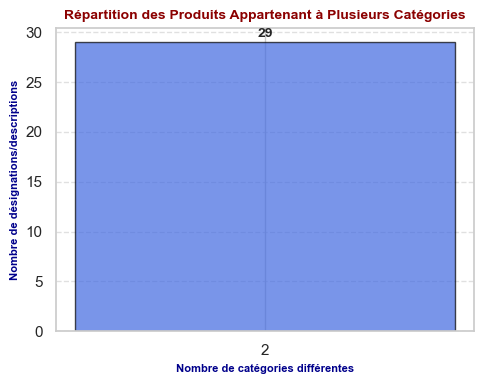

In [78]:
merged_df = merged_df.dropna(subset=["designation", "description"])

#  Produits avec la même `designation` et `description` dans plusieurs `prdtypecode`
same_designation_description = merged_df.groupby(["designation", "description"])["prdtypecode"].agg(list).reset_index()
same_designation_description = same_designation_description[same_designation_description["prdtypecode"].apply(lambda x: len(set(x)) > 1)]

# Recalcul du nombre de catégories différentes pour chaque produit
category_counts = same_designation_description["prdtypecode"].apply(lambda x: len(set(x))).value_counts().sort_index()

# Visualisation de la répartition
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(category_counts.index, category_counts.values, color="royalblue", edgecolor="black", alpha=0.7)

ax.set_xlabel("Nombre de catégories différentes", fontsize=8, fontweight='bold', color='darkblue')
ax.set_ylabel("Nombre de désignations/descriptions", fontsize=8, fontweight='bold', color='darkblue')
ax.set_title("Répartition des Produits Appartenant à Plusieurs Catégories", fontsize=10, fontweight='bold', color='darkred')

# Ajout des valeurs sur les barres
for i, v in enumerate(category_counts.values):
    ax.text(category_counts.index[i], v + 0.5, str(v), ha="center", fontsize=10, fontweight="bold")

# Forcer l'affichage de ticks entiers sur l'axe X
ax.set_xticks(np.arange(min(category_counts.index), max(category_counts.index) + 1, 1))

plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Certaines duplications sont réparties entre plusieurs catégories. Une analyse approfondie révèle que ces catégories sont souvent étroitement liées, comme "Jeu de société" et "Jouet enfant, déguisement" ou encore "Chambre et Décoration intérieure". Cette proximité thématique explique pourquoi des produits peuvent partager des désignations et descriptions similaires.

Parmi tous les doublons exacts identifiés, 29 cas ont été jugés réellement problématiques, impliquant des produits associés à un maximum de deux catégories différentes, généralement proches en termes d’usage ou de classification.

Cette situation peut entraîner une ambiguïté de prédiction, incitant le modèle à privilégier la catégorie la plus fréquente, même si elle n’est pas la plus pertinente. Cela nuit à la généralisation et augmente le risque de faux positifs pour les catégories moins représentées.

### Conclusion doublons textuels

Grace aux différentes analyses précédentes nous avons pu nous faire une meilleur idée de comment gérer les doublons
Plusieurs cas ont été decté ici :

1) L'analyse montre que les colonnes designation et description, prises isolément, contiennent de nombreux doublons. Toutefois, leur combinaison permet de mieux différencier les produits, la description apportant des précisions supplémentaires à la designation. Cette complémentarité facilite la distinction entre articles similaires, réduisant ainsi les risques de confusion.

Certains produits présentent une designation et une description strictement identiques tout en appartenant à la même catégorie. Cette situation peut entraîner un risque de surapprentissage (overfitting) : le modèle risque de mémoriser ces exemples spécifiques plutôt que d'apprendre les caractéristiques générales des produits. Cela pourrait compromettre sa capacité à généraliser efficacement face à de nouveaux articles.

Solutions : 
- Bien qu'il soit possible de supprimer ces doublons en ne conservant qu'un seul exemplaire par combinaison designation-description, cette approche n'a pas été retenue, car elle pourrait conduire à une perte d'informations utiles.
- Comme mentionné dans l'analyse des valeurs manquantes, la concaténation des informations semble être la stratégie la plus efficace pour limiter les problèmes de doublons. Cette méthode permet non seulement de combler les valeurs manquantes, mais aussi de réduire le nombre de doublons (il ne resterait que les doublonx exactes designation-description). 
- Pour limiter davantage le risque de surapprentissage, il serait pertinent d'enrichir les données après concaténation en intégrant des identifiants uniques tels que product_id ou image_id. Cette démarche renforcerait la distinction entre produits similaires tout en conservant la granularité des informations.
- Comme souligné dans l'analyse dédiée au prdtypecode, il est essentiel d'équilibrer les classes pour éviter que la presence des doublons n'accentuent les biais d'apprentissage (Si des doublons sont surreprésentés dans une classe dominante). Des techniques telles que le sur-échantillonnage des classes minoritaires, le sous-échantillonnage des classes majoritaires ou l'utilisation de pondérations lors de l'entraînement seront testés.




2) Un second problème survient lorsque des doublons exacts de designation et description sont associés à des catégories distinctes. Face à ces signaux contradictoires, le modèle peine à déterminer la catégorie correcte, augmentant ainsi le risque d'erreurs de classification.

Dans ce contexte, le modèle a tendance à sur-prédire la catégorie majoritaire, c'est-à-dire celle la plus fréquemment associée à une même combinaison designation-description, tout en sous-prédissant les catégories minoritaires. Ce biais compromet la capacité du modèle à identifier avec précision les produits appartenant aux classes moins représentées.

Solutions: 
- Encore il nous permet judicieux que l'ajout d'attributs distinctifs, tels que product_id, image_id pourraient palier a ce probleme.




## Longueur des colonnes designation et descriptions

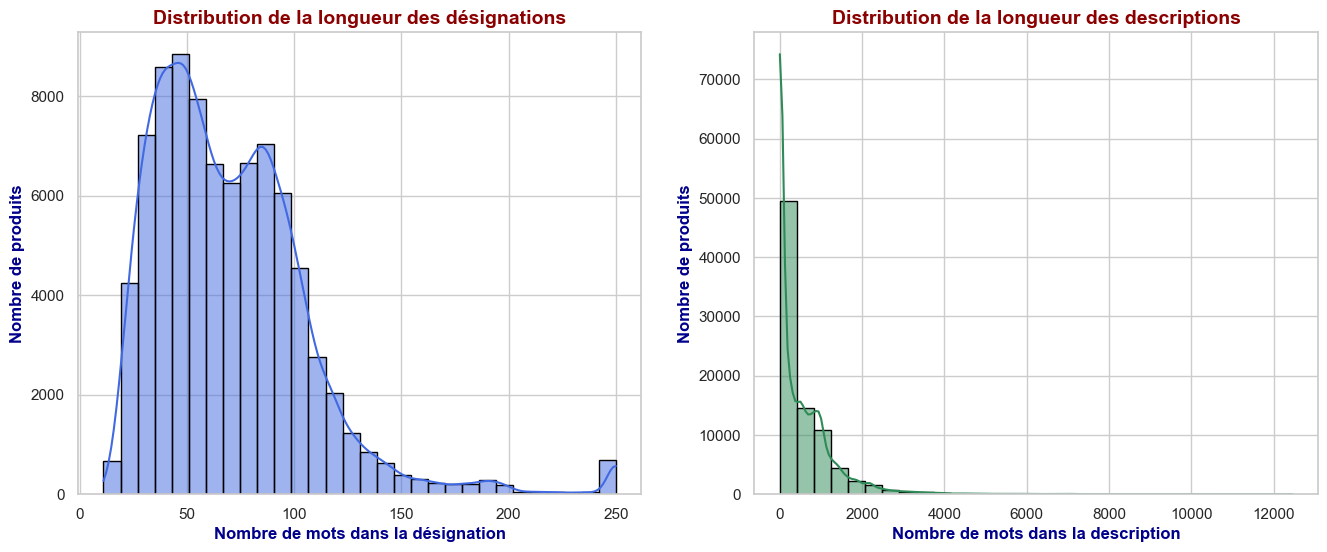

In [91]:
#Evaluation de la distribution de la longueur des  colonnes designations et descriptions
df_x["description"] = df_x["description"].fillna("")
df_x["designation"] = df_x["designation"].fillna("")

# Calcul de la longueur des descriptions et désignations
df_x["description_length"] = df_x["description"].str.len()
df_x["designation_length"] = df_x['designation'].str.len()

# Création de la figure pour afficher les deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogramme de la longueur des descriptions
sns.histplot(df_x["description_length"], bins=30, kde=True, color="seagreen", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Nombre de mots dans la description", fontsize=12, fontweight='bold', color='darkblue')
axes[1].set_ylabel("Nombre de produits", fontsize=12, fontweight='bold', color='darkblue')
axes[1].set_title("Distribution de la longueur des descriptions", fontsize=14, fontweight='bold', color='darkred')


# Histogramme de la longueur des désignations
sns.histplot(df_x["designation_length"], bins=30, kde=True, color="royalblue", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Nombre de mots dans la désignation", fontsize=12, fontweight='bold', color='darkblue')
axes[0].set_ylabel("Nombre de produits", fontsize=12, fontweight='bold', color='darkblue')
axes[0].set_title("Distribution de la longueur des désignations", fontsize=14, fontweight='bold', color='darkred')



plt.show()



L'analyse des longueurs de texte révèle des différences notables entre les colonnes designation (nom du produit) et description, avec la présence de nombreuses valeurs extrêmes nécessitant un nettoyage et une standardisation.

1. Longueur des désignations
La majorité des désignations ont une longueur comprise entre 30 et 100 caractères, ce qui est logique caar cette colonne devrait contenir des noms de produtis relativement succint.
Des outliers sont visibles au-delà de 200 mots, avec un pic notable autour de 250 mots, indiquant des désignations exceptionnellement longues.


2. Longueur des descriptions
Les descriptions montrent une variabilité beaucoup plus importante que les désignations :
La majorité des descriptions se situe sous les 1000 mots, avec un pic très marqué en dessous de 500 mots. La distribution est fortement étirée vers les valeurs élevées, avec des descriptions atteignant jusqu'à 12 000 mots.
Des outliers significatifs sont visibles au-delà de 2 000 mots, ce qui montre  la présence de contenus excessivement longs, dépassant parfois 5 000 caractères, voire 10 000 caractères pour certaines valeurs extrêmes.La présence de balises HTML pourrait expliquer certaines longueurs excessives.

3. Conclusion 
Dans les paragraphes précdents nous avons optés pour une strategie de concatenation des colonnes descriptions et designations. Au vu de l'etude des longueurs de ces deux colonnes nous voyons qu'un gros travail de nettoyage est à faire pour garantir la pertinence et la qualité de cette concatenation.

- Vérifier la présence de de baliess HTML (notamment dans descriptions) et les supprimer.
- Tokeniser
- Eliminer des stopwords, des mots inutiles, caracteres numeriques et alphanumerique, unité, abbreviations
- Passer en minuscule
- Supprimer les caractères spéciaux.
- Reduire à la racine (lemmatisation ou encore stemming)
- Limiter la longueur des textes pour éviter les outliers.


### Verification de l'existence de balises HTML
Nous souhaitons vérifier notre hypothèse selon laquelle la longueur importante des textes dans la colonne designation pourrait s'expliquer par la présence de composants HTML. Pour l'analyse de données textuelles, il n'est généralement pas nécessaire de détecter tous les composants HTML, nous nous sommes focusés exclusivement à detecter les patterns tag et entité car ce sont les éléments les plus susceptibles de fausser l'analyse.
Les attributs HTML souvent inclus dans les balises, donc détectés en même temps, les scripts et styles, si présents, ils seront capturés par la détection des balises.

In [92]:
# Expressions régulières pour détecter les balises et les entités HTML
html_tag_pattern = re.compile(r'<[^>]+>')          # Balises HTML : <p>, <br>, etc.
html_entity_pattern = re.compile(r'&[a-zA-Z0-9#]+;')  # Entités HTML : &lt;, &amp;, etc.

# Fonction pour vérifier la présence de HTML (balises ou entités)
def has_html(text):
    if pd.isnull(text):
        return False
    tag_match = bool(html_tag_pattern.search(text))
    entity_match = bool(html_entity_pattern.search(text))
    return tag_match or entity_match

# Vérification sur les colonnes 'designation' et 'description' de df_x
df_x['has_html_designation'] = df_x['designation'].apply(has_html)
df_x['has_html_description'] = df_x['description'].apply(has_html)

# Calcul des proportions
total_rows = len(df_x)
designation_with_html = df_x['has_html_designation'].sum()
description_with_html = df_x['has_html_description'].sum()

designation_proportion = (designation_with_html / total_rows) * 100
description_proportion = (description_with_html / total_rows) * 100

# Affichage des résultats
print(f"Nombre total de lignes : {total_rows}")
print(f"Lignes avec HTML (balise + entité dans 'designation' : {designation_with_html} ({designation_proportion:.2f}%)")
print(f"Lignes avec HTML dans 'description' : {description_with_html} ({description_proportion:.2f}%)")


Nombre total de lignes : 84916
Lignes avec HTML (balise + entité dans 'designation' : 991 (1.17%)
Lignes avec HTML dans 'description' : 40143 (47.27%)


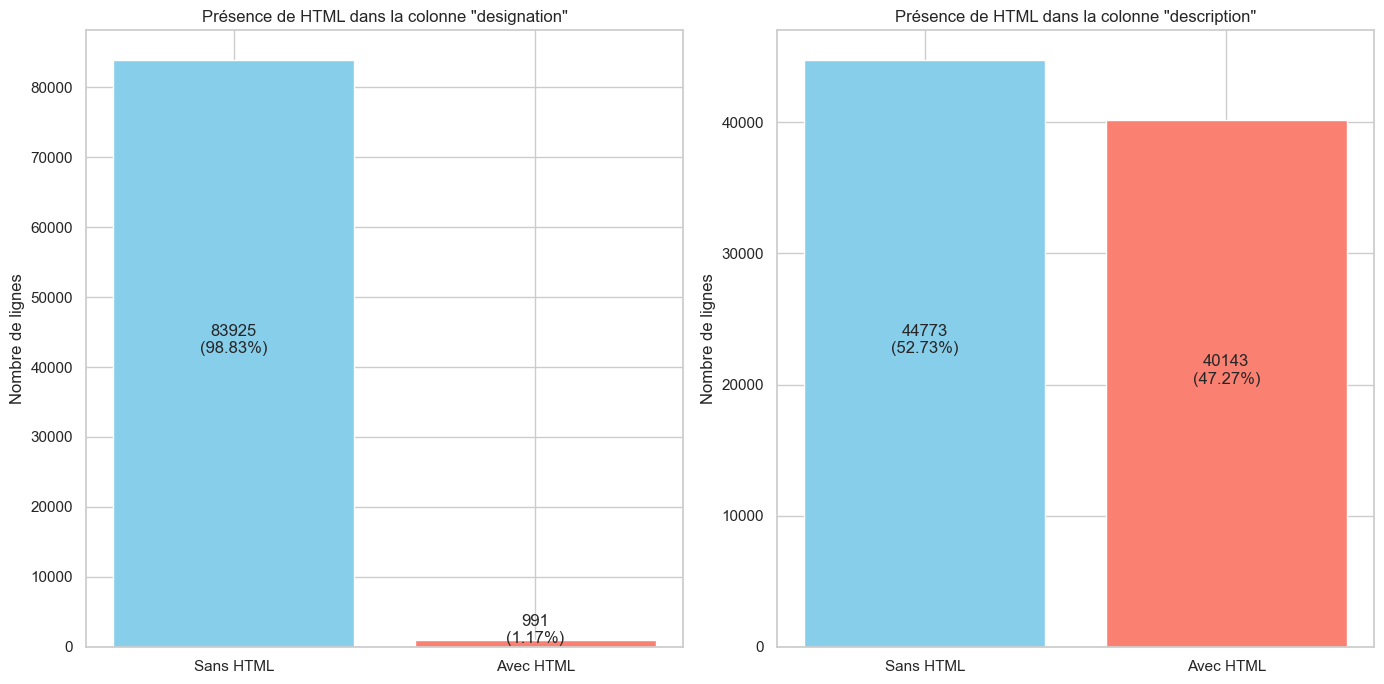

In [94]:
# Données pour le graphique
categories = ['Sans HTML', 'Avec HTML']
designation_counts = [total_rows - designation_with_html, designation_with_html]
description_counts = [total_rows - description_with_html, description_with_html]


plt.figure(figsize=(14, 7))

# Graphique pour la colonne 'designation'
plt.subplot(1, 2, 1)
plt.bar(categories, designation_counts, color=['skyblue', 'salmon'])
plt.title('Présence de HTML dans la colonne "designation"')
plt.ylabel('Nombre de lignes')
plt.text(0, designation_counts[0] / 2, f"{designation_counts[0]}\n({100 - designation_proportion:.2f}%)", ha='center')
plt.text(1, designation_counts[1] / 2, f"{designation_counts[1]}\n({designation_proportion:.2f}%)", ha='center')

# Graphique pour la colonne 'description'
plt.subplot(1, 2, 2)
plt.bar(categories, description_counts, color=['skyblue', 'salmon'])
plt.title('Présence de HTML dans la colonne "description"')
plt.ylabel('Nombre de lignes')
plt.text(0, description_counts[0] / 2, f"{description_counts[0]}\n({100 - description_proportion:.2f}%)", ha='center')
plt.text(1, description_counts[1] / 2, f"{description_counts[1]}\n({description_proportion:.2f}%)", ha='center')

# Affichage du graphique
plt.tight_layout()
plt.show()


L'analyse a confirmé notre hypothèse : la longueur importante des textes dans la colonne description s'explique en grande partie par la présence de composants HTML. En effet, près de la moitié des lignes contient des éléments HTML. Un nettoyage s'avère indispensable, car ces balises peuvent fausser les analyses, allonger inutilement les textes et compliquer la tâche des modèles de classification. 


Designation contient egalement des composants HTML, bien que cela est minime (1.17%). Cela suggère que le nettoyage des balises HTML pour cette colonne aura peu d'impact global, mais peut améliorer la clarté pour les quelques lignes concernées

## Analyse de la frequence des mots (sans preprocessing)
Observons maintenant la frequence des mots obtenus dans nos colonnes textuelles. 
Nous avons choisi d'effectuer cela sur la colonne designation, description et la colonne texte crée qui contiendra la concatenation de description et designation. Il est à noter que nous nous attendos à observer beaucoup de bruits puisqu'au prétraitement a été effectué. Il sera necessaire de comparer ce travail avant et après pré-traitement. 


### Globale


 Word Cloud enregistré : ./Analyse exploratoire/WordCloud/Globale\wordcloud_designation.png


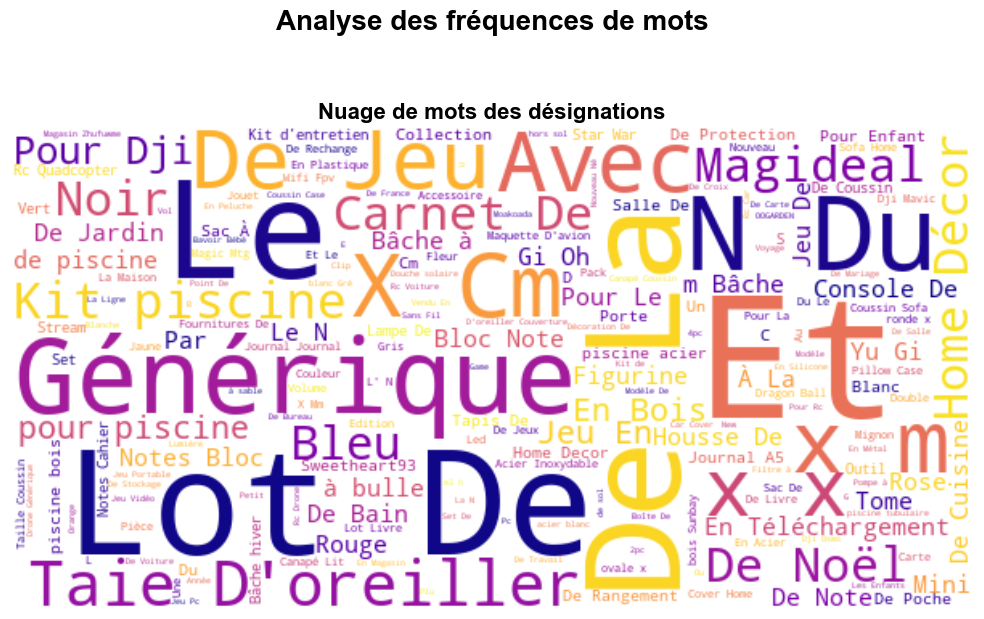

 Word Cloud enregistré : ./Analyse exploratoire/WordCloud/Globale\wordcloud_description.png


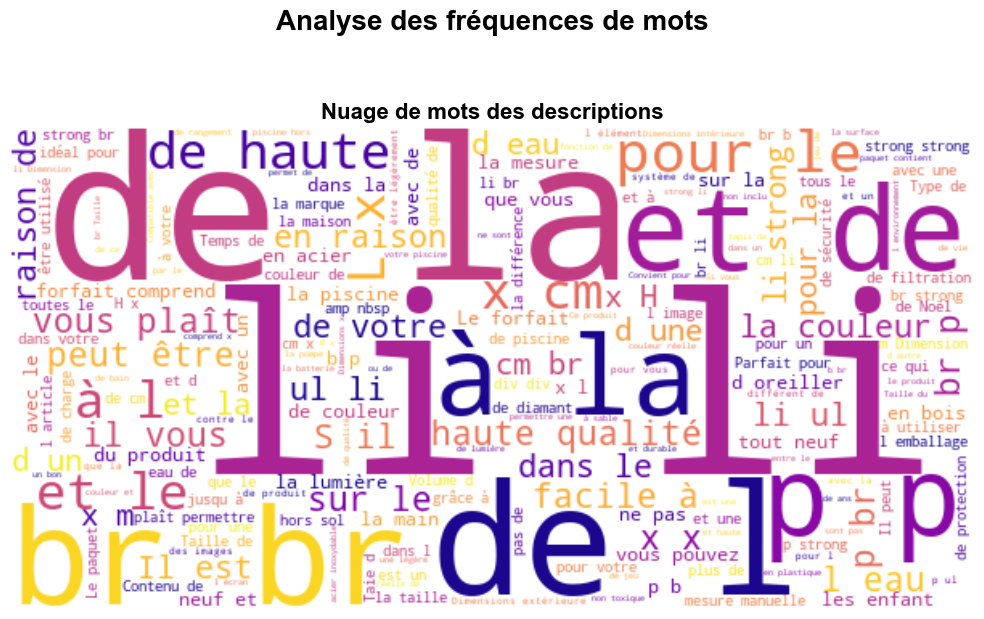

 Word Cloud enregistré : ./Analyse exploratoire/WordCloud/Globale\wordcloud_text.png


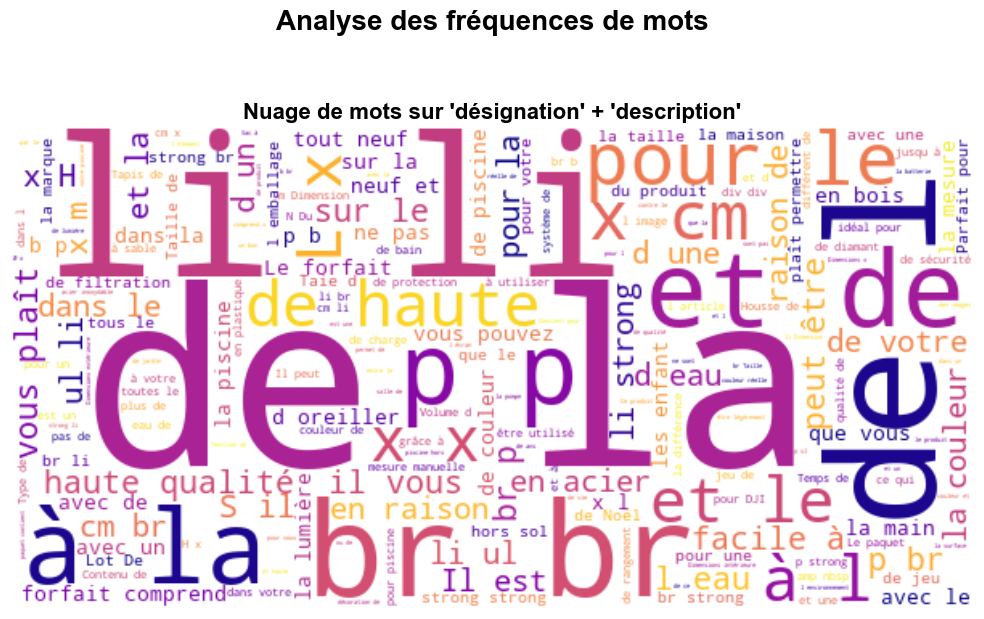

In [98]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dossier où enregistrer les images
save_dir = "./Analyse exploratoire/WordCloud/Globale"

# Vérifier si le dossier existe, sinon le créer
os.makedirs(save_dir, exist_ok=True)

# Configuration Word Clouds
wordcloud_config = {
    'width': 600,
    'height': 300,
    'background_color': 'white',
    'colormap': 'plasma',
    'max_words': 200,
    'contour_color': 'black',
    'contour_width': 1,
    'prefer_horizontal': 0.9,
    'random_state': 30
}

# Concaténation des colonnes "designation" et "description" en une colonne 'text'
df_x['text'] = df_x['designation'].fillna('') + ' ' + df_x['description'].fillna('')

# Fonction pour générer et enregistrer un Word Cloud
def generate_wordcloud(text, title, main_title, filename):
    plt.figure(figsize=(10, 7))
    plt.suptitle(main_title, fontsize=20, fontweight='bold', color='black')
    
    wordcloud = WordCloud(**wordcloud_config).generate(" ".join(text.dropna().astype(str)))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16, fontweight='bold', color='black')
    plt.tight_layout()
    
    # Enregistrement de l'image
    save_path = os.path.join(save_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f" Word Cloud enregistré : {save_path}")
    
    plt.show()

# Génération et sauvegarde des Word Clouds
generate_wordcloud(df_x["designation"], "Nuage de mots des désignations", "Analyse des fréquences de mots", "wordcloud_designation.png")
generate_wordcloud(df_x["description"], "Nuage de mots des descriptions", "Analyse des fréquences de mots", "wordcloud_description.png")
generate_wordcloud(df_x["text"], "Nuage de mots sur 'désignation' + 'description'", "Analyse des fréquences de mots", "wordcloud_text.png")


Comme prévu, nos différents Word Clouds sont pollués par un bruit important, principalement dû à la présence de stopwords (de, la, et, pour, à, le, etc.) ainsi qu'à des balises HTML résiduelles telles que br, li, et ul. Ces éléments faussent l'analyse, masquant les termes réellement pertinents. Un nettoyage rigoureux permettra de révéler des mots plus utiles pour la classification.
Néanmoins, nous confirmons la prédominance des mots français, avec seulement quelques termes en anglais apparaissant en arrière-plan.

1. Analyse des désignations :
Les termes "home", "decor", "piscine", "cm", "kit", "noir", "taie" et "d'oreiller" apparaissent en grande fréquence, indiquant leur forte présence dans la colonne designation.
Cela suggère une prédominance de produits liés à la décoration intérieure (home decor) et aux accessoires pour piscines (kit piscine).

 2. Analyse des descriptions :
Les termes "haute qualité", "eau", et "cm" dominent, reflétant des descriptions techniques, notamment pour des articles liés à la piscine, à la filtration ou au bricolage.

Cependant, la persistance des balises HTML (br, li, ul) montre que la colonne description nécessite un nettoyage approfondi pour éviter que ces composants n'influencent les modèles de classification.

3. Analyse de la concaténation (désignation + description) :
De manière intéressante, le Word Cloud basé sur la concaténation des colonnes designation et description ressemble fortement à celui généré à partir de la colonne description seule.
Cette similarité s'explique par la prépondérance de la colonne description, dont la longueur est amplifiée par la présence excessive de balises HTML.


Un nettoyage avancé (suppression des balises HTML, des stopwords et des mots courts) est essentiel pour affiner l'analyse et améliorer la performance des modèles de classification. Ce nettoyage permettra de mieux exploiter les informations produits et de réduire l'influence des données non pertinentes.

### Par categorie

Nous avons choisi d'analyser des Word Clouds par catégorie afin de comprendre les spécificités lexicales de chaque classe et de de repérer les eventuelles chevauchements entre catégories.

In [99]:
display (merged_df)

,designation,description,productid,imageid,prdtypecode,categorie
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,Accessoire Console
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,Livre neuf
7,Conquérant Sept Cahier Couverture Polypro 240 ...,CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...,344240059,999581347,2522,Bureautique et papeterie
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...,3793572222,1245644185,2582,Mobilier extérieur
10,Eames Inspired Sxw Chair - Pink - Black,The timeless DSW seat can now be paired with m...,1915836983,1111840281,1560,Mobilier intérieur
...,...,...,...,...,...,...
84908,Dimmerable Usb Led Lampe De Bureau Réglable Ch...,Nom de la marque:oobest<br />Ampoules incluses...,4198481300,1313620762,2060,Décoration intérieure
84909,espa - kit complet de nage à contre courant 39...,espa espa - kit complet de nage à contre coura...,853455937,1043841028,2583,Autour de la piscine
84910,Vêtements Pour Animaux Mode Style Chiens Rayé ...,le t - shirt rayé mode chiens petits chiots v...,2699568414,1158527239,2220,Animal
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,2583,Autour de la piscine


In [101]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configuration des Word Clouds
wordcloud_config = {
    'width': 800,
    'height': 600,
    'background_color': 'white',
    'colormap': 'plasma',
    'max_words': 50,
    'contour_color': 'black',
    'contour_width': 1,
    'prefer_horizontal': 0.9,
    'random_state': 42
}

# Concaténation des colonnes "designation" et "description" en une colonne 'text'
merged_df['text'] = merged_df['designation'].fillna('') + ' ' + merged_df['description'].fillna('')

# Dossier de sortie pour les Word Clouds
save_dir = "./Analyse exploratoire/WordCloud/Categories"
os.makedirs(save_dir, exist_ok=True)

# Génération des Word Clouds par catégorie
categories = merged_df['prdtypecode'].unique()

for category in categories:
    category_text = merged_df[merged_df['prdtypecode'] == category]['text'].dropna().astype(str)
    if not category_text.empty:
        wordcloud = WordCloud(**wordcloud_config).generate(" ".join(category_text))
        wordcloud_file = os.path.join(save_dir, f"wordcloud_category_{category}.png")
        wordcloud.to_file(wordcloud_file)

print(f"Les Word Clouds ont été enregistrés dans le dossier : {save_dir}")


Les Word Clouds ont été enregistrés dans le dossier : ./Analyse exploratoire/WordCloud/Categories


Le même constat s'applique (ici on workcloud uniquemnt sur la concaténation (description + designation)). Le bruit généré par les stopwords, les balises HTML résiduelles (br, li, ul) et les mots génériques masque les relations claires entre les catégories de produits et les mots-clés pertinents.

Sans un nettoyage rigoureux, il reste difficile d'identifier des termes distinctifs propres à chaque catégorie. Une suppression des éléments parasites permettra d'affiner l'analyse et de mieux cerner les mots-clés réellement discriminants.




## Detection des langues

Lors de notre première analyse du DataFrame, renforcée par l'examen de la fréquence des mots à travers un Word Cloud, nous avons constaté la présence de plusieurs langues, avec une prédominance marquée du français.

Afin d'optimiser l'efficacité du traitement — après avoir observé que l'analyse individuelle par colonne était particulièrement chronophage — et en accord avec notre stratégie de concaténation des données textuelles, nous avons choisi de détecter les langues directement sur ce texte concaténé.

In [102]:
# Initialisation du générateur aléatoire pour la reproductibilité
DetectorFactory.seed = 42

# Fonction pour détecter la langue principale d'un texte
def detect_language(text):
    """Détecte la langue principale d'un texte"""
    try:
        return detect(text)
    except:
        return "unknown"  # Si la détection échoue

# Barre de progression pour la détection des langues
tqdm.pandas(desc="Détection des langues")
df_x["language"] = df_x['text'].progress_apply(detect_language)

# Distribution des langues détectées avec tqdm
print("\nCalcul de la distribution des langues :")
lang_distribution = df_x["language"].value_counts()

# Affichage des résultats
for lang, count in tqdm(lang_distribution.items(), desc="Analyse des langues détectées", unit="langue"):
    print(f"{lang}: {count} occurrences")

# Afficher des exemples par langue détectée
print("\nExemples par langue détectée :")
for lang in tqdm(lang_distribution.index[:3], desc="Extraction des exemples", unit="langue"):
    print(f"\nExemples pour la langue '{lang}':")
    print(df_x[df_x["language"] == lang]["text"].head(5).to_string(index=False))


Détection des langues: 100%|██████████| 84916/84916 [05:35<00:00, 253.34it/s]



Calcul de la distribution des langues :


Analyse des langues détectées: 31langue [00:00, ?langue/s]


fr: 65076 occurrences
en: 12411 occurrences
de: 2677 occurrences
nl: 1102 occurrences
ca: 785 occurrences
it: 637 occurrences
ro: 363 occurrences
es: 331 occurrences
pt: 294 occurrences
id: 196 occurrences
no: 175 occurrences
af: 120 occurrences
tl: 117 occurrences
da: 94 occurrences
et: 68 occurrences
sv: 64 occurrences
sw: 57 occurrences
so: 47 occurrences
hr: 45 occurrences
sl: 40 occurrences
fi: 38 occurrences
cy: 37 occurrences
pl: 36 occurrences
vi: 35 occurrences
tr: 26 occurrences
hu: 11 occurrences
sk: 11 occurrences
lt: 10 occurrences
lv: 6 occurrences
sq: 4 occurrences
cs: 3 occurrences

Exemples par langue détectée :


Extraction des exemples: 100%|██████████| 3/3 [00:00<00:00, 94.95langue/s]


Exemples pour la langue 'fr':
Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'...
Grand Stylet Ergonomique Bleu Gamepad Nintendo ...
La Guerre Des Tuques Luc a des id&eacute;es de ...
Afrique Contemporaine N° 212 Hiver 2004 - Dossi...
Conquérant Sept Cahier Couverture Polypro 240 X...

Exemples pour la langue 'en':
        Puzzle Scooby-Doo Avec Poster 2x35 Pieces 
Eames Inspired Sxw Chair - Pink - Black The tim...
Peaceable Kingdom Wheres Bear? The Hide And Fin...
              Mod Podge Dishwasher Safe Gloss 8oz 
Power Rangers Rouge Force Mystic Figurine Trans...

Exemples pour la langue 'de':
Olivia: Personalisiertes Notizbuch / 150 Seiten...
Peluche Donald - Europe - Disneyland 2000 (Mari...
       Christof E: Bildungsprozessen Auf Der Spur 
Glitter Beach Barbie By Barbie Original Barbie ...
Figurine Zhu Zhu Pets - Zhu Zhu Pet Dans Son Pa...


In [103]:
nombre_de_langues = df_x["language"].nunique()

print(f"Nombre total de langues détectées : {nombre_de_langues}")

Nombre total de langues détectées : 31


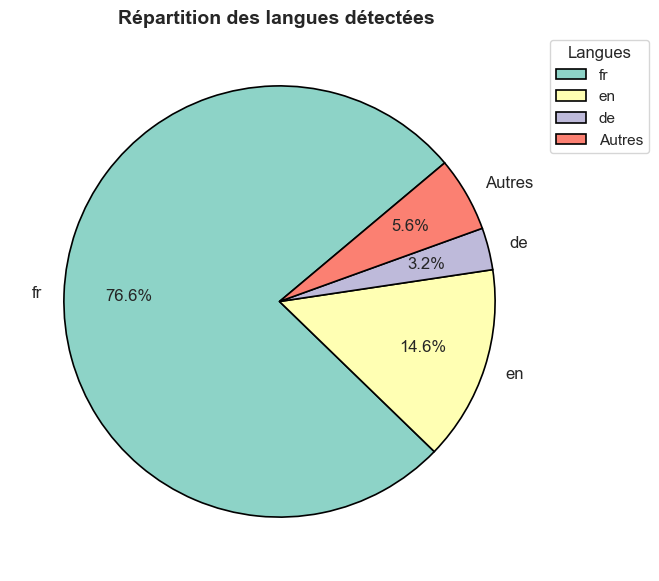

In [104]:
# Calcul de la distribution des langues
lang_distribution = df_x["language"].value_counts()

# Regrouper les catégories inférieures à 5 % en "Autres"
threshold = 0.02 * lang_distribution.sum()
small_categories = lang_distribution[lang_distribution < threshold].sum()
lang_distribution = lang_distribution[lang_distribution >= threshold]
if small_categories > 0:
    lang_distribution['Autres'] = small_categories

# Fonction pour formater les pourcentages
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

# Création du graphique en camembert
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    lang_distribution,
    labels=lang_distribution.index,
    autopct=autopct_format,
    startangle=40,
    colors=plt.cm.Set3.colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
    textprops={'fontsize': 12},
    pctdistance = 0.7
)

for i, autotext in enumerate(autotexts):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2.0 + wedges[i].theta1
    if lang_distribution.values[i] < threshold:
        if 90 <= angle <= 270:  # Segments du côté gauche du cercle
            autotext.set_rotation(angle + 180)  # Rotation à l'envers pour suivre la courbe
        else:
            autotext.set_rotation(angle)

plt.title("Répartition des langues détectées ", fontsize=14, fontweight='bold')
plt.legend(title="Langues", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


Le dataset compte 31 langues differentes d'apres nos calculs.
La majorité des textes sont en français, représentant plus des 3/4 du total (77%). Cela confirme que le corpus est principalement composé de descriptions rédigées en français. Environ 1 texte sur 7 est rédigé en anglais (14.6%)
Cela suggère une présence non négligeable de produits internationaux, probablement importés ou vendus sur des plateformes multilingues.
Un petit pourcentage des textes est en allemand (3.2%). Cette part reste faible mais indique quelques descriptions non traduites, potentiellement issues de fournisseurs européens. A elles seules, ces trois catégories représentent 94.4% des langues utilisés dans nos données textuelles
La catégorie "Autres" regroupe les langues minoritaires, y compris le néerlandais, l'italien ou des textes mal identifiés.
Cela peut inclure des données bruitées, comme des descriptions partiellement traduites ou des combinaisons de langues.


Après documentation, les modèles de classification fonctionnent en français, mais leur performance dépend du type de modèle choisi. Sachant que nous avons tout de même 23 % de données dans d'autres langues, il est important de tester si une traduction en français améliore ou non les performances. Certains modèles sont optimisés pour des données monolingues en français (comme CamemBERT), tandis que d'autres fonctionnent bien sur des corpus multilingues (comme mBERT).

Pour identifier la meilleure stratégie, nous devons comparer les performances selon deux approches :

Scénario 1 Les données restent dans leur langue d'origine (français, anglais, allemand, etc.). Nous pourrons tester les modèles compatibles avec une telle approche (mBERT ou modèles classiques (TF-IDF + SVM).


Scénario 2 : Traduction en français des 23 % de données non francophones en français. modèles compatibles : CamemBERT, FastText



# Analyse Colonne product_id
Verification si les IDs suivent une logique qui pourrait influencer la catégorie de produit prdtypeproduct

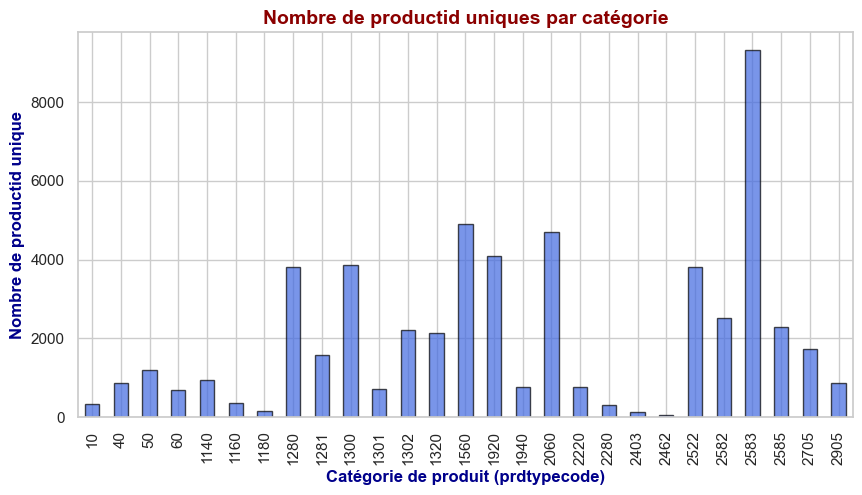

In [87]:
plt.figure(figsize=(10,5))
merged_df.groupby('prdtypecode')['productid'].nunique().plot(kind='bar', color="royalblue", edgecolor="black", alpha=0.7)
plt.xlabel("Catégorie de produit (prdtypecode)", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Nombre de productid unique", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Nombre de productid uniques par catégorie", fontsize=14, fontweight='bold', color='darkred')
plt.show()

Distribution aleatoire des IDs suggérant que le productID ne soit pas informatif de la categorie


In [84]:
#ProductID  est il corrélé avec prdtypecode
correlation = merged_df[['productid', 'prdtypecode']].corr()

display (correlation)

,productid,prdtypecode
productid,1.000000,-0.104584
prdtypecode,-0.104584,1.000000


Il ne semble pas avoir de correlation entre ces deux variables vu le score de 0.075517


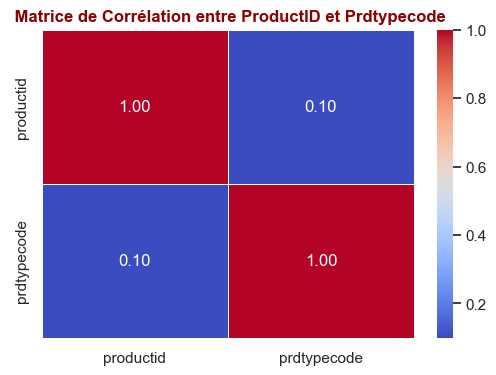

In [85]:
df_merged = df_x.merge(df_y, left_index=True, right_index=True, how="inner")

# Calcul de la matrice de corrélation
correlation = df_merged[['productid', 'prdtypecode']].corr()

# Création du graphique Heatmap
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)

ax.set_title(" Matrice de Corrélation entre ProductID et Prdtypecode", fontsize=12, fontweight='bold', color='darkred')

# Affichage du graphique
plt.show()

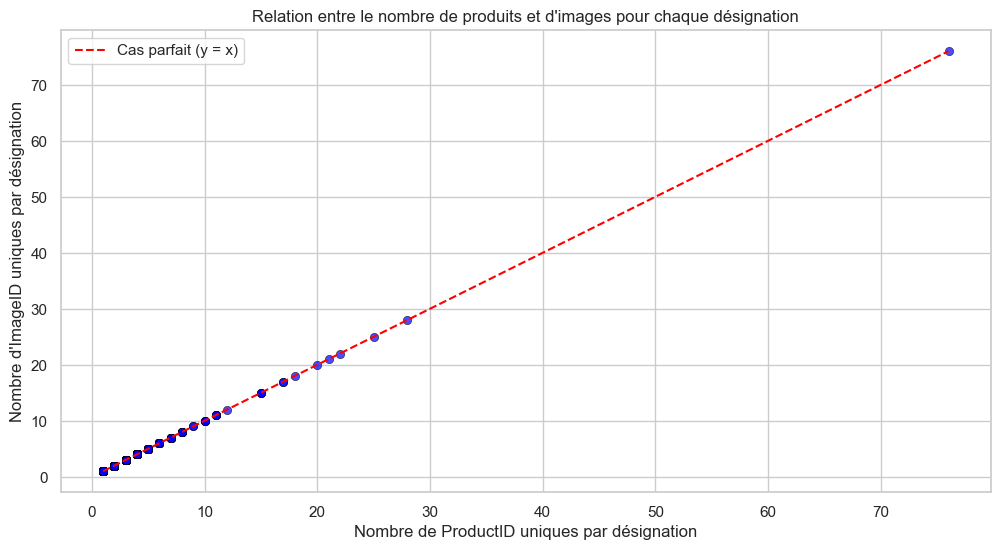

In [86]:
# Calcul du nombre de ProductID et ImageID uniques par désignation
designation_product_count = df_x.groupby("designation")[["productid", "imageid"]].nunique()

# Calcul du maximum des axes pour tracer la diagonale
max_val = max(designation_product_count["productid"].max(), designation_product_count["imageid"].max())


plt.figure(figsize=(12, 6))
sns.scatterplot(x=designation_product_count["productid"], 
                y=designation_product_count["imageid"], 
                alpha=0.7, edgecolor='black', color="blue")

# Ajout de la ligne parfaite où chaque désignation a autant de produits que d'images (y = x)
plt.plot(np.arange(1, max_val + 1), np.arange(1, max_val + 1), linestyle="dashed", color="red", label="Cas parfait (y = x)")


plt.xlabel("Nombre de ProductID uniques par désignation")
plt.ylabel("Nombre d'ImageID uniques par désignation")
plt.title("Relation entre le nombre de produits et d'images pour chaque désignation")
plt.legend()
plt.show()


Pour chaque désignation le nombre de ProductID et ImageID est identique => chaque produit a une seule image associée

# SPLIT DES DONNEES

In [196]:
df_x = pd.read_csv("./Raw DFs/X_train_update.csv",index_col=0)
df_y=pd.read_csv("./Raw DFs/Y_train_CVw08PX.csv",index_col=0)

merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True)
merged_df.sort_values(by='imageid', inplace=True)

# Chemins des répertoires
image_dir = r"C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\images\images\image_train"
output_dir = r"C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\images\images"

# Création des répertoires de sortie pour les images
for folder in ['train', 'test', 'val']:
    os.makedirs(os.path.join(output_dir, folder), exist_ok=True)

# Split des données (80% train, 10% test, 10% validation)
df_train, df_temp = train_test_split(merged_df, test_size=0.2, random_state=42, stratify=merged_df['prdtypecode'])
df_test, df_val = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['prdtypecode'])

# Fonction pour déplacer les images avec barre de progression
def move_images(dataframe, target_folder):
    moved = 0
    not_found = 0

    print(f"\nDéplacement des images vers le dossier : {target_folder}")
    for image_id in tqdm(dataframe['imageid'], desc=f"Traitement {target_folder}", unit="image"):
        # Recherche des fichiers correspondant à l'image_id
        pattern = re.compile(rf"image_{image_id}_product_\d+\.jpg")
        found = False

        # Parcours des fichiers pour trouver la correspondance
        for filename in os.listdir(image_dir):
            if pattern.match(filename):
                source_path = os.path.join(image_dir, filename)
                target_path = os.path.join(output_dir, target_folder, filename)
                
                # Copie du fichier
                shutil.copy(source_path, target_path)
                moved += 1
                found = True
                break

        if not found:
            not_found += 1

    print(f"{moved} images déplacées vers {target_folder}.")
    if not_found > 0:
        print(f"{not_found} images non trouvées pour le dossier {target_folder}.")

# Exécution pour chaque split avec la barre de progression
move_images(df_train, "train")
move_images(df_test, "test")
move_images(df_val, "val")

# Séparation des variables features et cible
def split_features_target(dataframe):
    X = dataframe.drop(columns=['prdtypecode'])  # Features
    y = dataframe['prdtypecode']                 # Cible
    return X, y

# Séparation pour chaque ensemble
X_train, y_train = split_features_target(df_train)
X_test, y_test = split_features_target(df_test)
X_val, y_val = split_features_target(df_val)

# Sauvegarde des datasets
X_train.to_csv("./Split dfs/X_train.csv", index=True)
y_train.to_csv("./Split dfs/y_train.csv", index=True)
X_test.to_csv("./Split dfs/X_test.csv", index=True)
y_test.to_csv("./Split dfs/y_test.csv", index=True)
X_val.to_csv("./Split dfs/X_val.csv", index=True)
y_val.to_csv("./Split dfs/y_val.csv", index=True)

print("\nSplit terminé. Les images sont triées et les datasets sauvegardés.")



Déplacement des images vers le dossier : train


Traitement train: 100%|██████████| 67932/67932 [2:09:14<00:00,  8.76image/s]  


67932 images déplacées vers train.

Déplacement des images vers le dossier : test


Traitement test: 100%|██████████| 8492/8492 [18:10<00:00,  7.79image/s]


8492 images déplacées vers test.

Déplacement des images vers le dossier : val


Traitement val: 100%|██████████| 8492/8492 [18:32<00:00,  7.64image/s]


8492 images déplacées vers val.

Split terminé. Les images sont triées et les datasets sauvegardés.


In [199]:
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
val_dir = os.path.join(output_dir, 'val')

# Lister les fichiers dans chaque répertoire
train_images = os.listdir(train_dir)
test_images = os.listdir(test_dir)
val_images = os.listdir(val_dir)

# Afficher les premières images transférées
print(f"Images transférées dans train ({len(train_images)} fichiers) : {train_images[:5]}")
print(f"Images transférées dans test ({len(test_images)} fichiers) : {test_images[:5]}")
print(f"Images transférées dans val ({len(val_images)} fichiers) : {val_images[:5]}")

Images transférées dans train (67932 fichiers) : ['image_1000076039_product_580161.jpg', 'image_1000095646_product_344209267.jpg', 'image_1000099971_product_352683003.jpg', 'image_1000100220_product_352601770.jpg', 'image_1000222973_product_351172420.jpg']
Images transférées dans test (8492 fichiers) : ['image_1000441257_product_356912201.jpg', 'image_1000523845_product_357696021.jpg', 'image_1000855430_product_361327550.jpg', 'image_1001631392_product_302693296.jpg', 'image_1001646826_product_371862664.jpg']
Images transférées dans val (8492 fichiers) : ['image_1000089455_product_348990858.jpg', 'image_1000092894_product_353108104.jpg', 'image_1000093804_product_343306951.jpg', 'image_1000095647_product_148177050.jpg', 'image_1000425043_product_349046352.jpg']


In [200]:
# Liste des images transféré en df
train_df = pd.DataFrame({'image_name': train_images})
test_df = pd.DataFrame({'image_name': test_images})
val_df = pd.DataFrame({'image_name': val_images})

# Sauvegarde dans des fichiers CSV
train_df.to_csv("./Split dfs/train_images_list.csv", index=False)
test_df.to_csv("./Split dfs/test_images_list.csv", index=False)
val_df.to_csv("./Split dfs/val_images_list.csv", index=False)